### Problem:
You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995..


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('Shoe-Sales.csv', parse_dates=True,squeeze=True,index_col=0)
df1.head()

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
Name: Shoe_Sales, dtype: int64

In [4]:
df2 = pd.read_csv('SoftDrink.csv', parse_dates=True,squeeze=True,index_col=0)
df2.head()

YearMonth
1980-01-01    1954
1980-02-01    2302
1980-03-01    3054
1980-04-01    2414
1980-05-01    2226
Name: SoftDrinkProduction, dtype: int64

Text(0, 0.5, 'Shoe Sales')

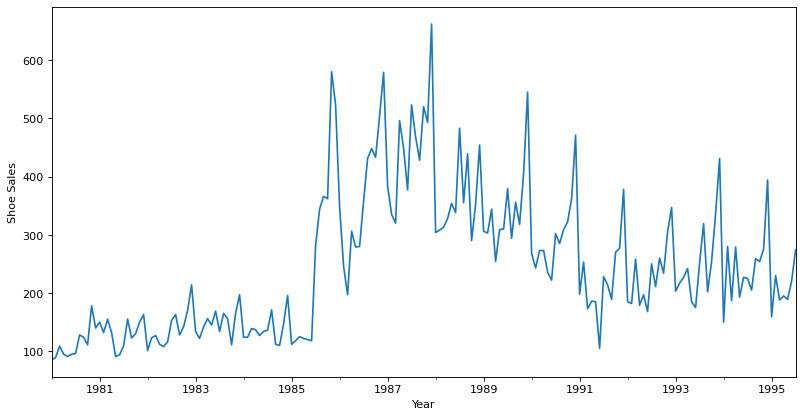

In [5]:
figure(figsize=(12, 6), dpi=80)
df1.plot();
plt.xlabel("Year")
plt.ylabel("Shoe Sales")

Text(0, 0.5, 'SoftDrink Sales')

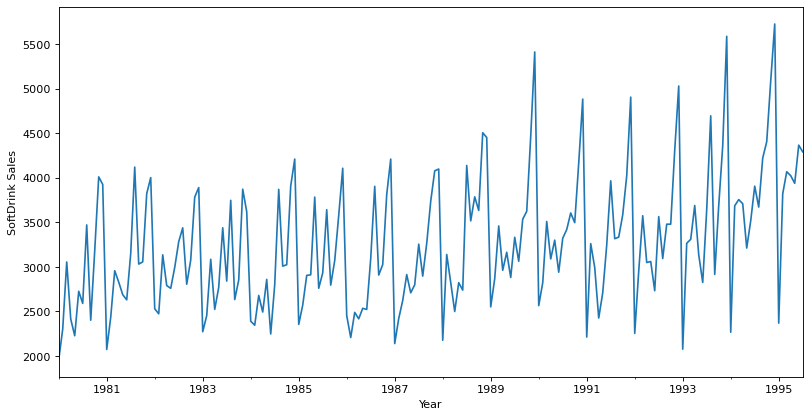

In [6]:
figure(figsize=(12, 6), dpi=80)
df2.plot();
plt.xlabel("Year")
plt.ylabel("SoftDrink Sales")

In [7]:
df1.shape

(187,)

In [8]:
df1.describe()

count    187.000000
mean     245.636364
std      121.390804
min       85.000000
25%      143.500000
50%      220.000000
75%      315.500000
max      662.000000
Name: Shoe_Sales, dtype: float64

In [9]:
df2.shape

(187,)

In [10]:
df2.describe()

count     187.000000
mean     3262.609626
std       728.357367
min      1954.000000
25%      2748.000000
50%      3134.000000
75%      3741.000000
max      5725.000000
Name: SoftDrinkProduction, dtype: float64

In [11]:
df1.isnull().sum()

0

In [12]:
df2.isnull().sum()

0

### Plot a year on year boxplot for the Shoe Sales production.

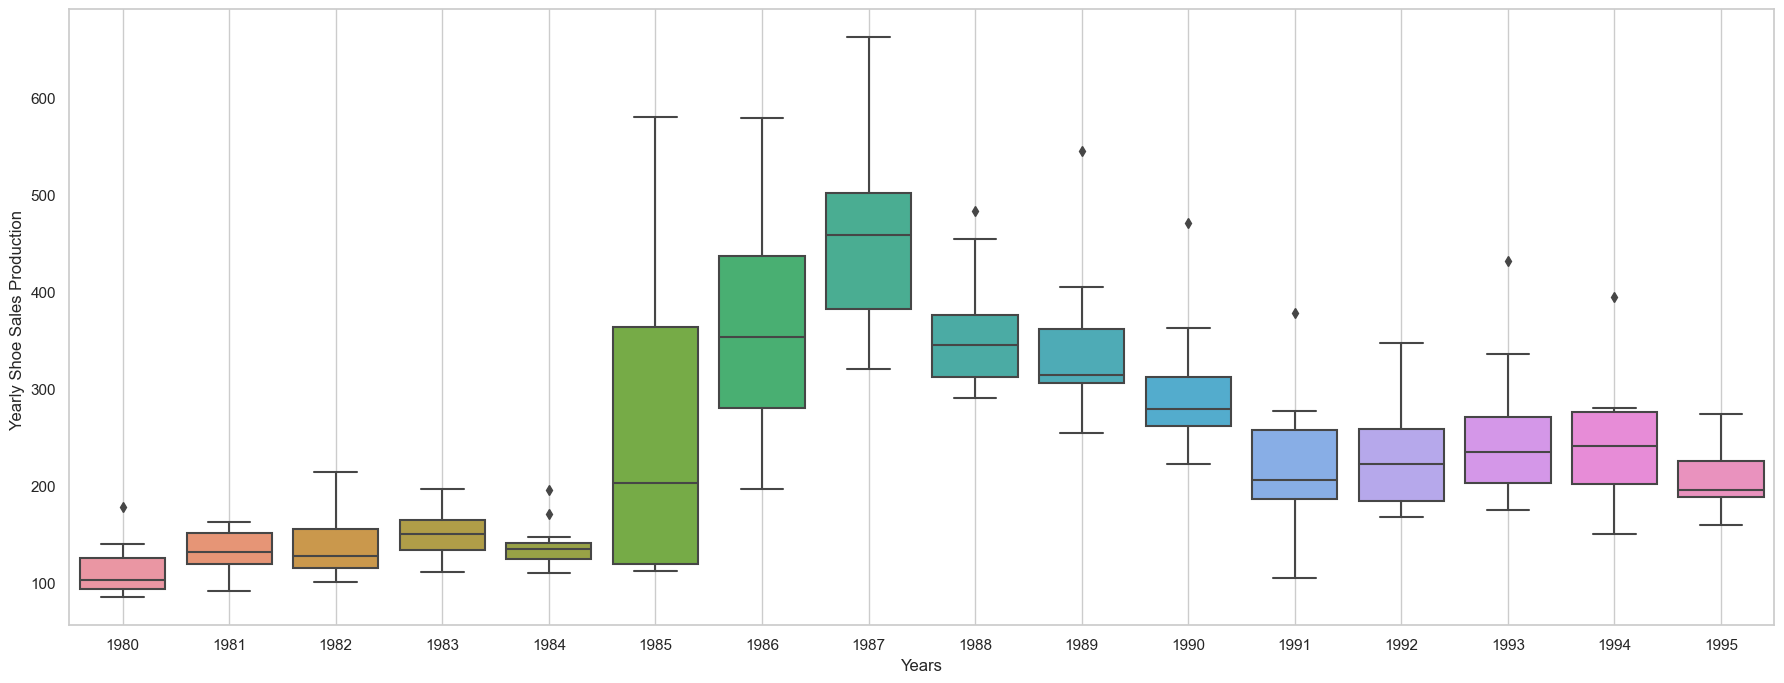

In [13]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.year, df1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Shoe Sales Production ');

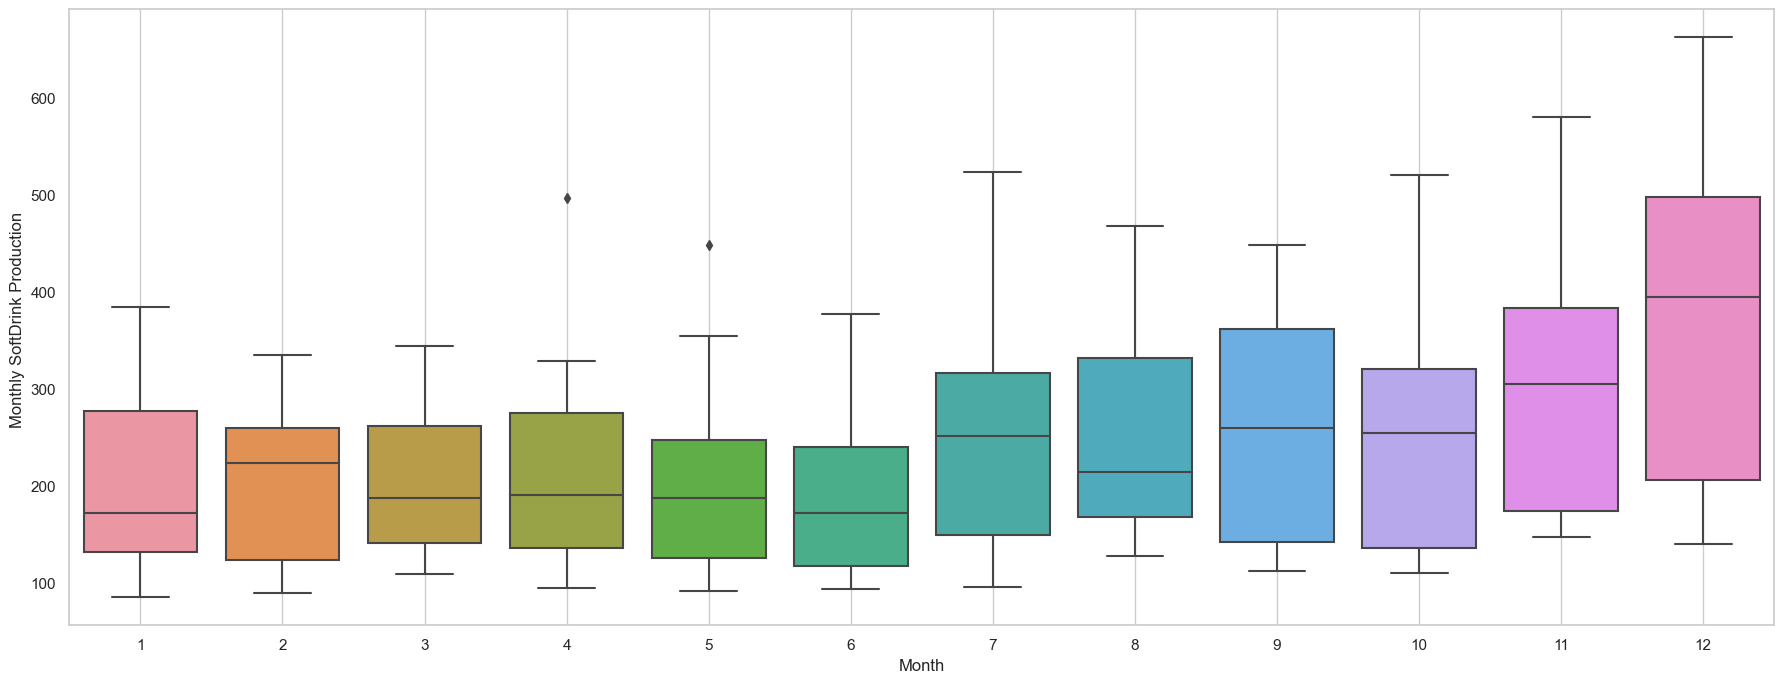

In [14]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.month, df1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Month');
plt.ylabel('Monthly SoftDrink Production ');

## 

### Plot a year on year boxplot for the Shoe Sales production.

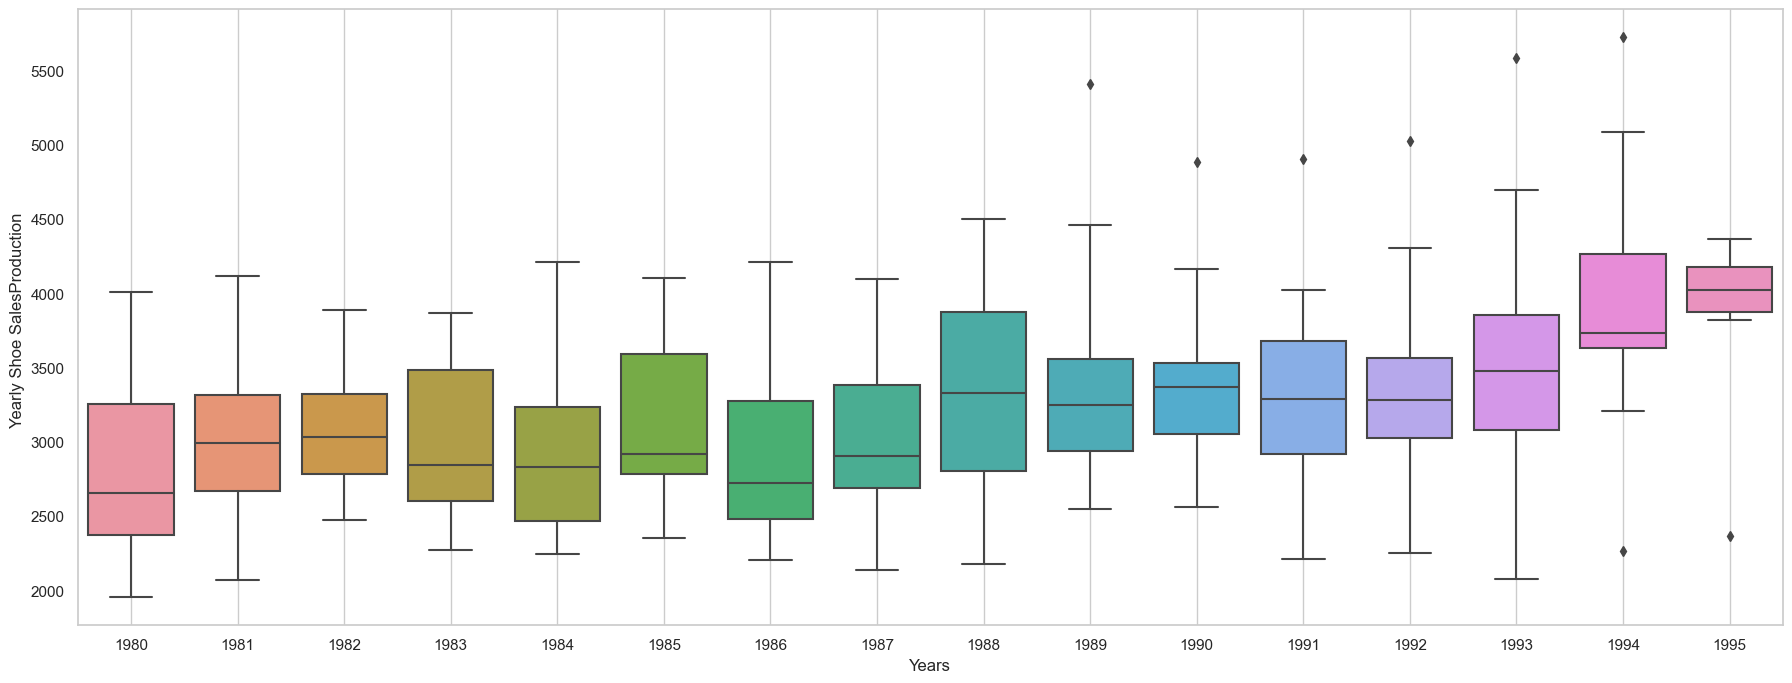

In [15]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df2.index.year, df2, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Shoe SalesProduction ');

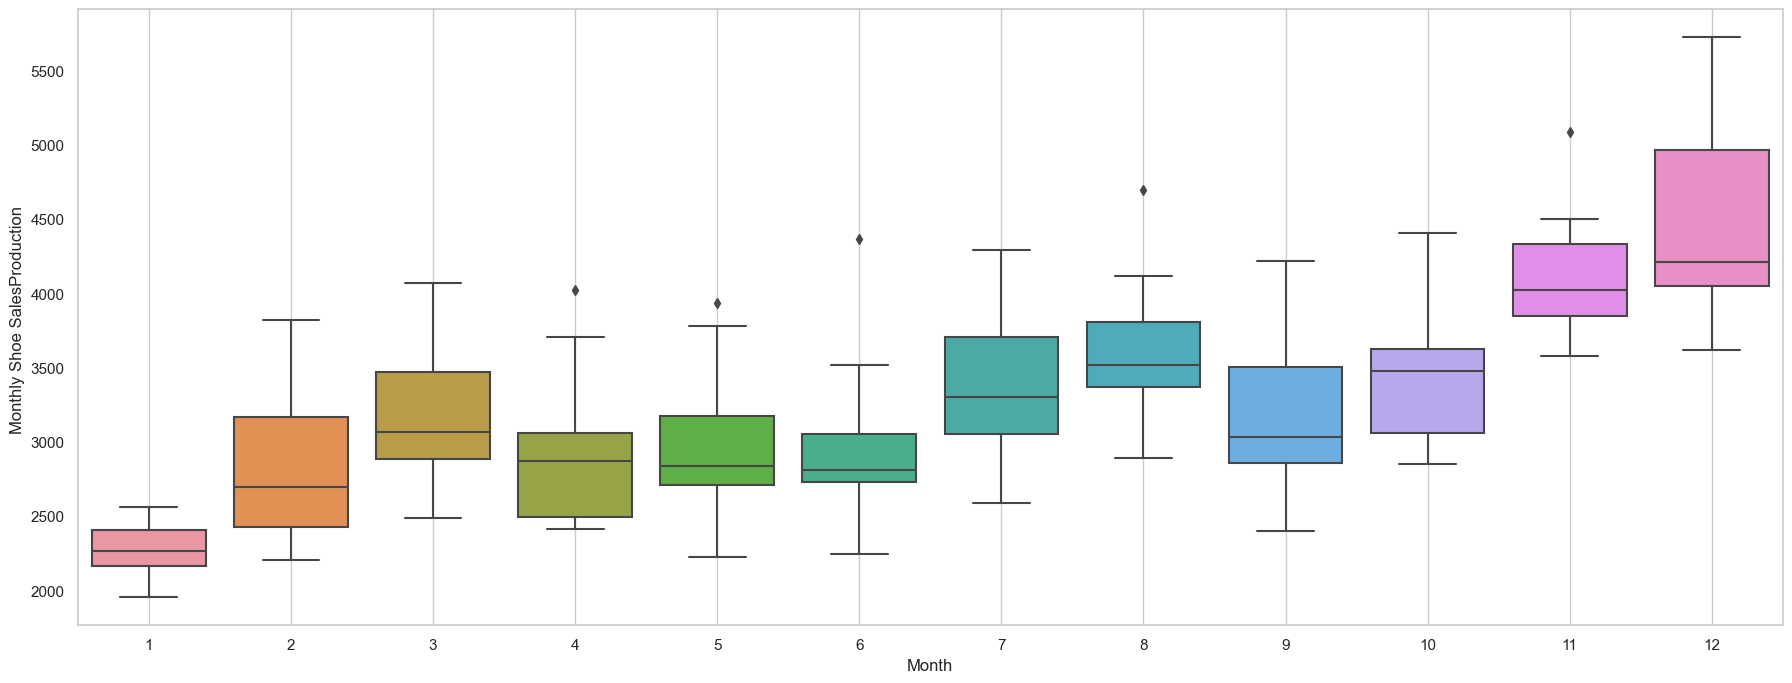

In [16]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df2.index.month, df2, ax=ax,whis=1.5)
plt.grid(None);
plt.xlabel('Month');
plt.ylabel('Monthly Shoe SalesProduction ');

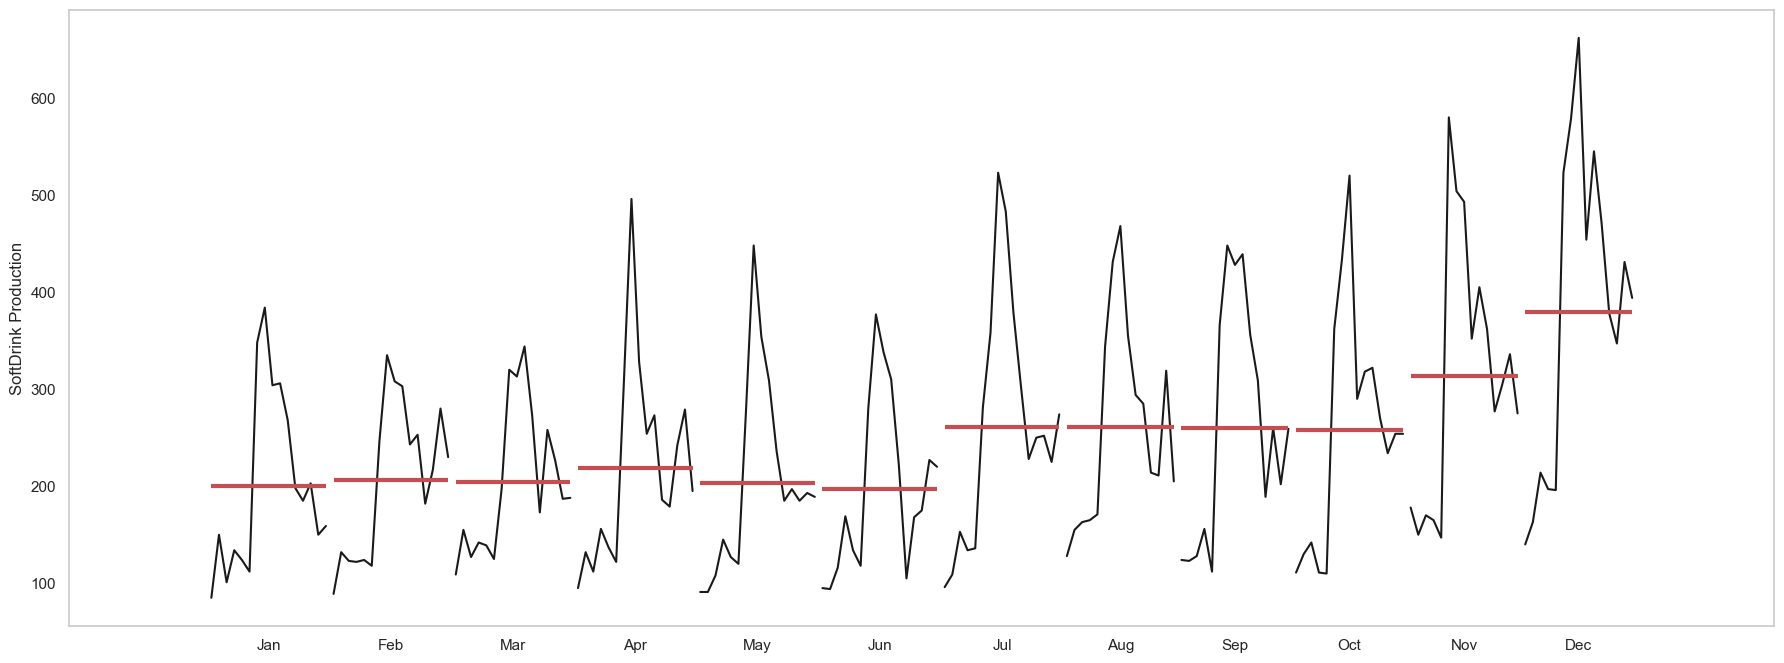

In [17]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df1,ylabel='SoftDrink Production',ax=ax)
plt.grid();

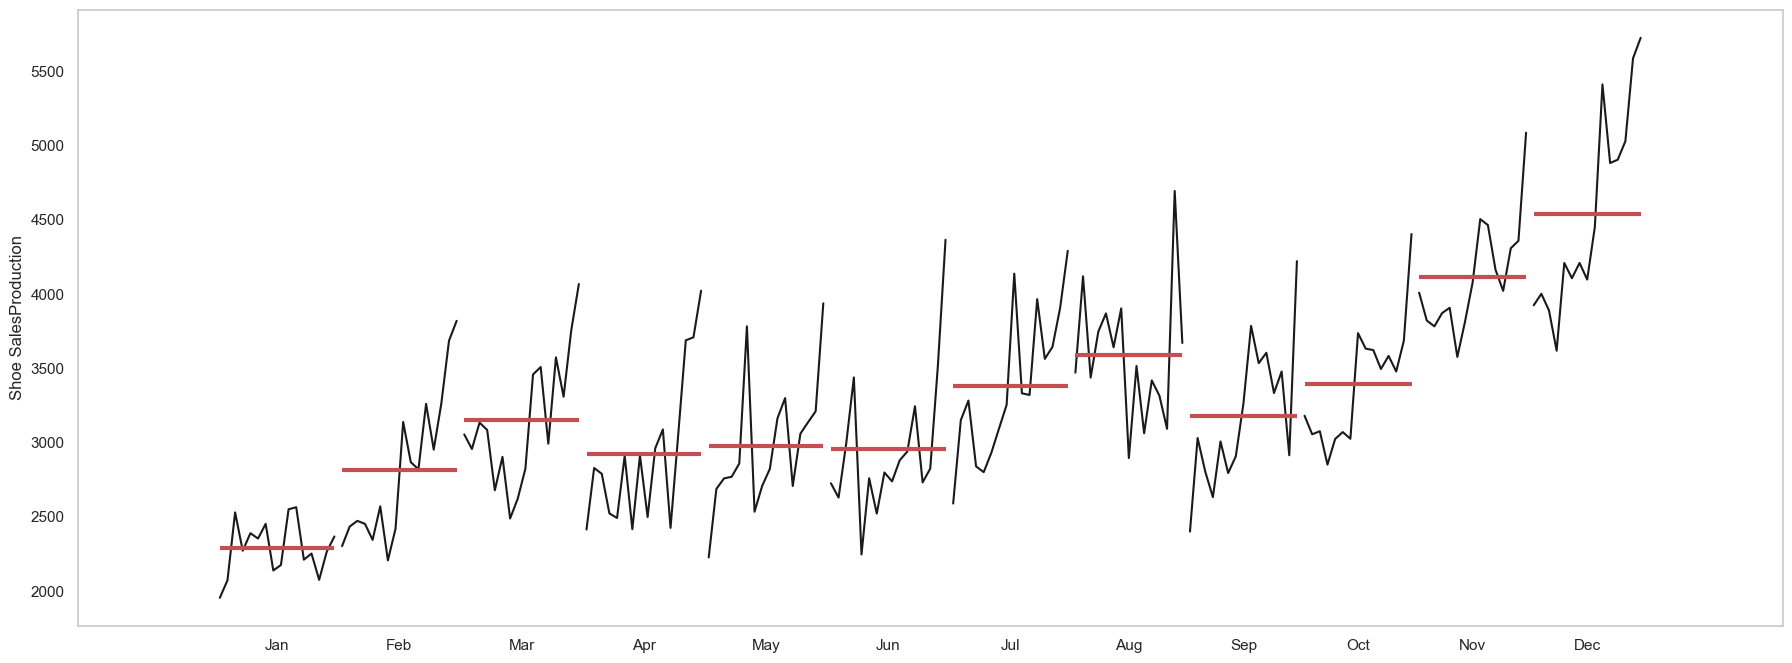

In [18]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df2,ylabel='Shoe SalesProduction',ax=ax)
plt.grid();

In [19]:
df_2 = pd.read_csv("Shoe-Sales.csv")

In [20]:
date = pd.date_range(start='1/1/1980', end='7/1/1995', freq='M')

In [21]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

YearMonth  Shoe_Sales Time_Stamp
0   1980-01          85 1980-01-31
1   1980-02          89 1980-02-29
2   1980-03         109 1980-03-31
3   1980-04          95 1980-04-30
4   1980-05          91 1980-05-31

In [22]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

YearMonth  Shoe_Sales
Time_Stamp                      
1980-01-31   1980-01          85
1980-02-29   1980-02          89
1980-03-31   1980-03         109
1980-04-30   1980-04          95
1980-05-31   1980-05          91

In [23]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91

In [24]:
df_2 ['Shoe_Sales']

Time_Stamp
1980-01-31     85
1980-02-29     89
1980-03-31    109
1980-04-30     95
1980-05-31     91
             ... 
1995-03-31    188
1995-04-30    195
1995-05-31    189
1995-06-30    220
NaT           274
Name: Shoe_Sales, Length: 187, dtype: int64

In [25]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Shoe_Sales', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   \
Time_Stamp                                                                  
1980.0       85.0   89.0  109.0   95.0   91.0   95.0   96.0  128.0  124.0   
1981.0      150.0  132.0  155.0  132.0   91.0   94.0  109.0  155.0  123.0   
1982.0      101.0  123.0  127.0  112.0  108.0  116.0  153.0  163.0  128.0   
1983.0      134.0  122.0  142.0  156.0  145.0  169.0  134.0  165.0  156.0   
1984.0      124.0  124.0  139.0  137.0  127.0  134.0  136.0  171.0  112.0   
1985.0      112.0  118.0  125.0  122.0  120.0  118.0  281.0  344.0  366.0   
1986.0      348.0  246.0  197.0  306.0  279.0  280.0  358.0  431.0  448.0   
1987.0      384.0  335.0  320.0  496.0  448.0  377.0  523.0  468.0  428.0   
1988.0      304.0  308.0  313.0  328.0  354.0  338.0  483.0  355.0  439.0   
1989.0      306.0  303.0  344.0  254.0  309.0  310.0  379.0  294.0  356.0   
1990.0      268.0  243.0  273.0  273.0  236.0  222.0  302.0  285.0  309.0   
1991.0      198.0  253.0  173.0  186.0  185.0  105.0  228.0  214.0  189.0   
1992.0      185.0  182.0  258.0  179.0  197.0  168.0  250.0  211.0  260.0   
1993.0      203.0  217.0  227.0  242.0  185.0  175.0  252.0  319.0  202.0   
1994.0      150.0  280.0  187.0  279.0  193.0  227.0  225.0  205.0  259.0   
1995.0      159.0  230.0  188.0  195.0  189.0  220.0    NaN    NaN    NaN   

Time_Stamp   10.0   11.0   12.0  
Time_Stamp                       
1980.0      111.0  178.0  140.0  
1981.0      130.0  150.0  163.0  
1982.0      142.0  170.0  214.0  
1983.0      111.0  165.0  197.0  
1984.0      110.0  147.0  196.0  
1985.0      362.0  580.0  523.0  
1986.0      433.0  504.0  579.0  
1987.0      520.0  493.0  662.0  
1988.0      290.0  352.0  454.0  
1989.0      318.0  405.0  545.0  
1990.0      322.0  362.0  471.0  
1991.0      270.0  277.0  378.0  
1992.0      234.0  305.0  347.0  
1993.0      254.0  336.0  431.0  
1994.0      254.0  275.0  394.0  
1995.0        NaN    NaN    NaN

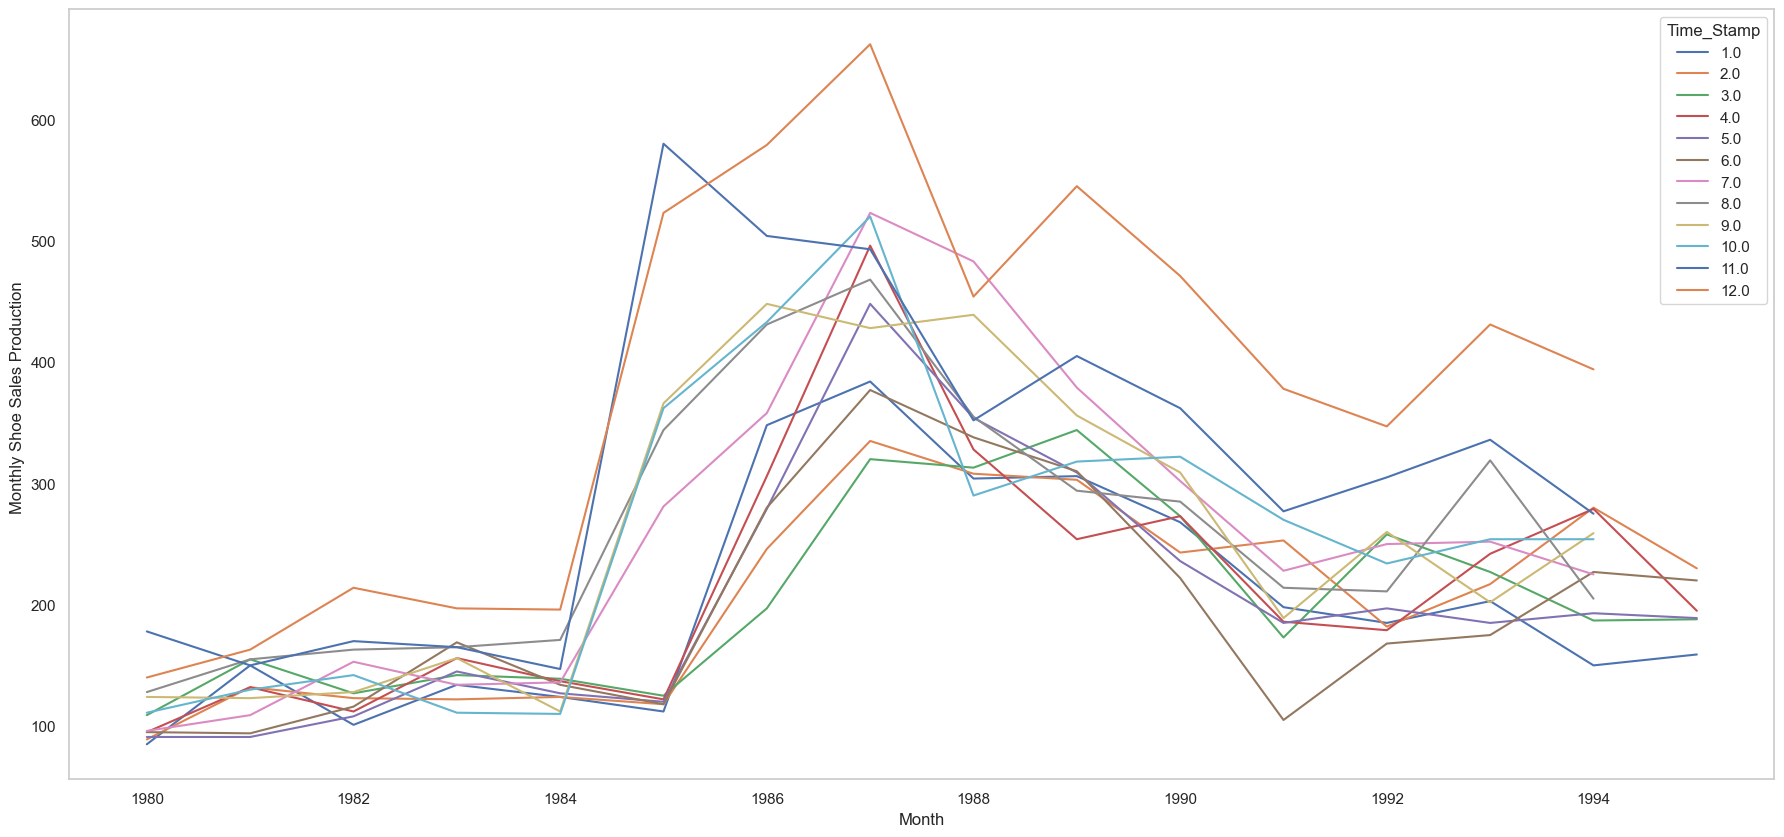

In [26]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();
plt.xlabel('Month');
plt.ylabel('Monthly Shoe Sales Production ');

In [27]:
df_3 = pd.read_csv("SoftDrink.csv")

In [28]:
df_3['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_3.head()

YearMonth  SoftDrinkProduction Time_Stamp
0   1980-01                 1954 1980-01-31
1   1980-02                 2302 1980-02-29
2   1980-03                 3054 1980-03-31
3   1980-04                 2414 1980-04-30
4   1980-05                 2226 1980-05-31

In [29]:
df_3.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_3.head()

YearMonth  SoftDrinkProduction
Time_Stamp                               
1980-01-31   1980-01                 1954
1980-02-29   1980-02                 2302
1980-03-31   1980-03                 3054
1980-04-30   1980-04                 2414
1980-05-31   1980-05                 2226

In [30]:
df_3['SoftDrinkProduction']

Time_Stamp
1980-01-31    1954
1980-02-29    2302
1980-03-31    3054
1980-04-30    2414
1980-05-31    2226
              ... 
1995-03-31    4067
1995-04-30    4022
1995-05-31    3937
1995-06-30    4365
NaT           4290
Name: SoftDrinkProduction, Length: 187, dtype: int64

In [31]:
yearly_sales_across_months = pd.pivot_table(df_3, values = 'SoftDrinkProduction', columns = df_3.index.month, 
                                        index = df_3.index.year)

yearly_sales_across_months

Time_Stamp    1.0     2.0     3.0     4.0     5.0     6.0     7.0     8.0   \
Time_Stamp                                                                   
1980.0      1954.0  2302.0  3054.0  2414.0  2226.0  2725.0  2589.0  3470.0   
1981.0      2072.0  2434.0  2956.0  2828.0  2687.0  2629.0  3150.0  4119.0   
1982.0      2529.0  2472.0  3134.0  2789.0  2758.0  2993.0  3282.0  3437.0   
1983.0      2271.0  2452.0  3084.0  2522.0  2769.0  3438.0  2839.0  3746.0   
1984.0      2389.0  2344.0  2678.0  2492.0  2858.0  2246.0  2800.0  3869.0   
1985.0      2353.0  2570.0  2903.0  2910.0  3782.0  2759.0  2931.0  3641.0   
1986.0      2452.0  2206.0  2488.0  2416.0  2534.0  2521.0  3093.0  3903.0   
1987.0      2138.0  2419.0  2622.0  2912.0  2708.0  2798.0  3254.0  2895.0   
1988.0      2175.0  3138.0  2823.0  2498.0  2822.0  2738.0  4137.0  3515.0   
1989.0      2550.0  2867.0  3458.0  2961.0  3163.0  2880.0  3331.0  3062.0   
1990.0      2564.0  2820.0  3508.0  3088.0  3299.0  2939.0  3320.0  3418.0   
1991.0      2211.0  3260.0  2992.0  2425.0  2707.0  3244.0  3965.0  3315.0   
1992.0      2252.0  2952.0  3573.0  3048.0  3059.0  2731.0  3563.0  3092.0   
1993.0      2075.0  3264.0  3308.0  3688.0  3136.0  2824.0  3644.0  4694.0   
1994.0      2265.0  3685.0  3754.0  3708.0  3210.0  3517.0  3905.0  3670.0   
1995.0      2367.0  3819.0  4067.0  4022.0  3937.0  4365.0     NaN     NaN   

Time_Stamp    9.0     10.0    11.0    12.0  
Time_Stamp                                  
1980.0      2400.0  3180.0  4009.0  3924.0  
1981.0      3030.0  3055.0  3821.0  4001.0  
1982.0      2804.0  3076.0  3782.0  3889.0  
1983.0      2632.0  2851.0  3871.0  3618.0  
1984.0      3007.0  3023.0  3907.0  4209.0  
1985.0      2794.0  3070.0  3576.0  4106.0  
1986.0      2907.0  3025.0  3812.0  4209.0  
1987.0      3263.0  3736.0  4077.0  4097.0  
1988.0      3785.0  3632.0  4504.0  4451.0  
1989.0      3534.0  3622.0  4464.0  5411.0  
1990.0      3604.0  3495.0  4163.0  4882.0  
1991.0      3333.0  3583.0  4021.0  4904.0  
1992.0      3478.0  3478.0  4308.0  5029.0  
1993.0      2914.0  3686.0  4358.0  5587.0  
1994.0      4221.0  4404.0  5086.0  5725.0  
1995.0         NaN     NaN     NaN     NaN

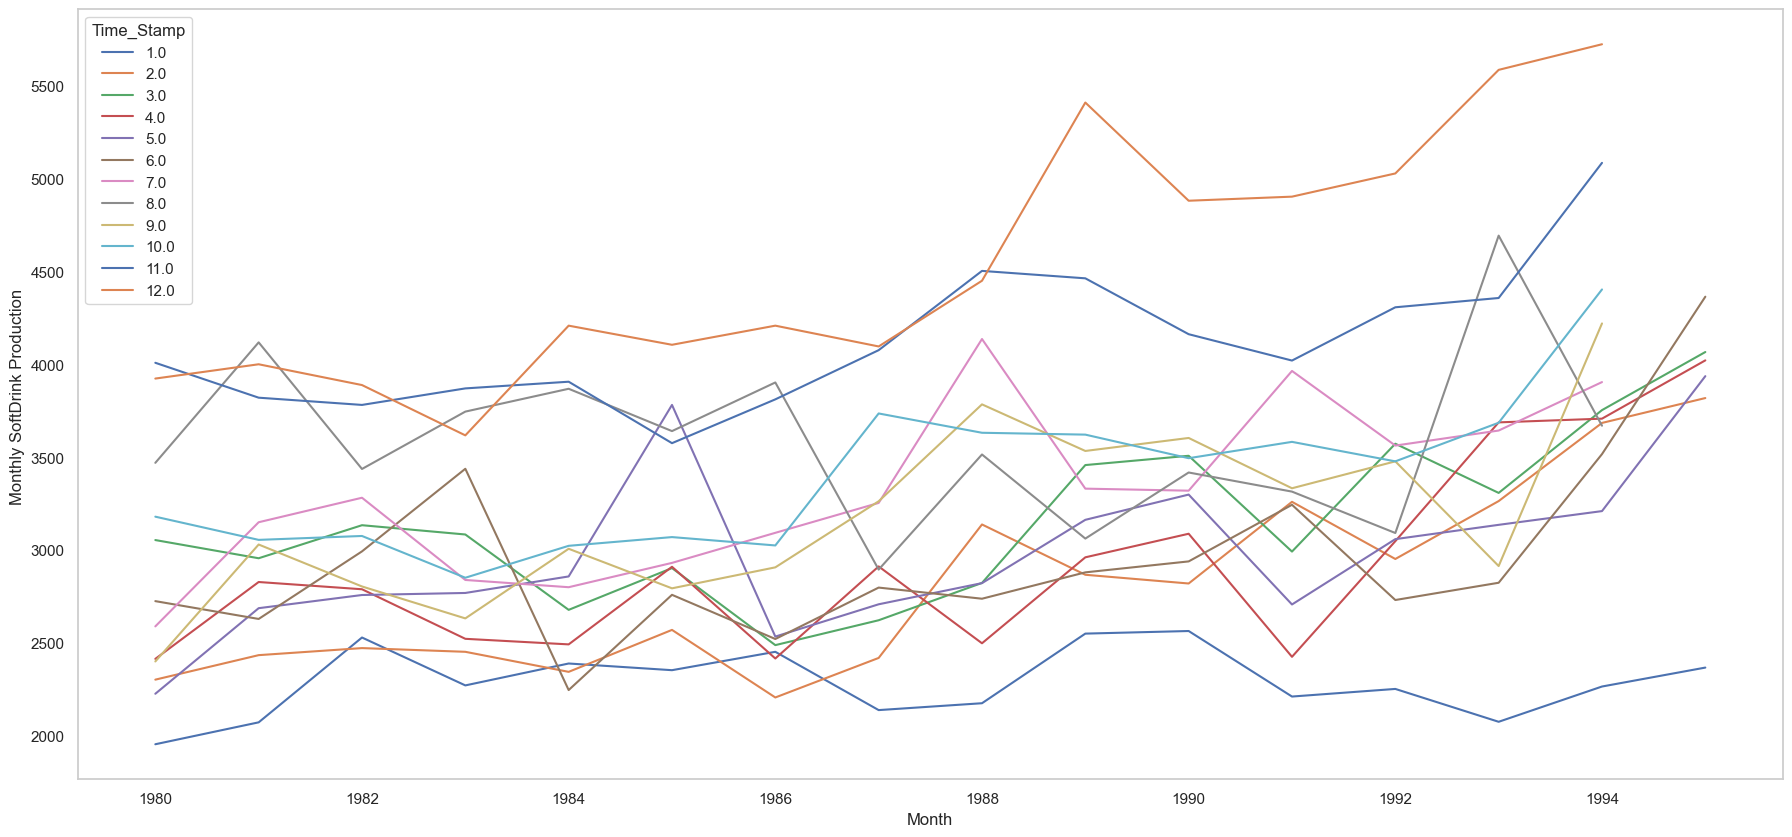

In [32]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();
plt.xlabel('Month');
plt.ylabel('Monthly SoftDrink Production ');

## Decompose the Time Series

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
df2 = df2.fillna(method='ffill')

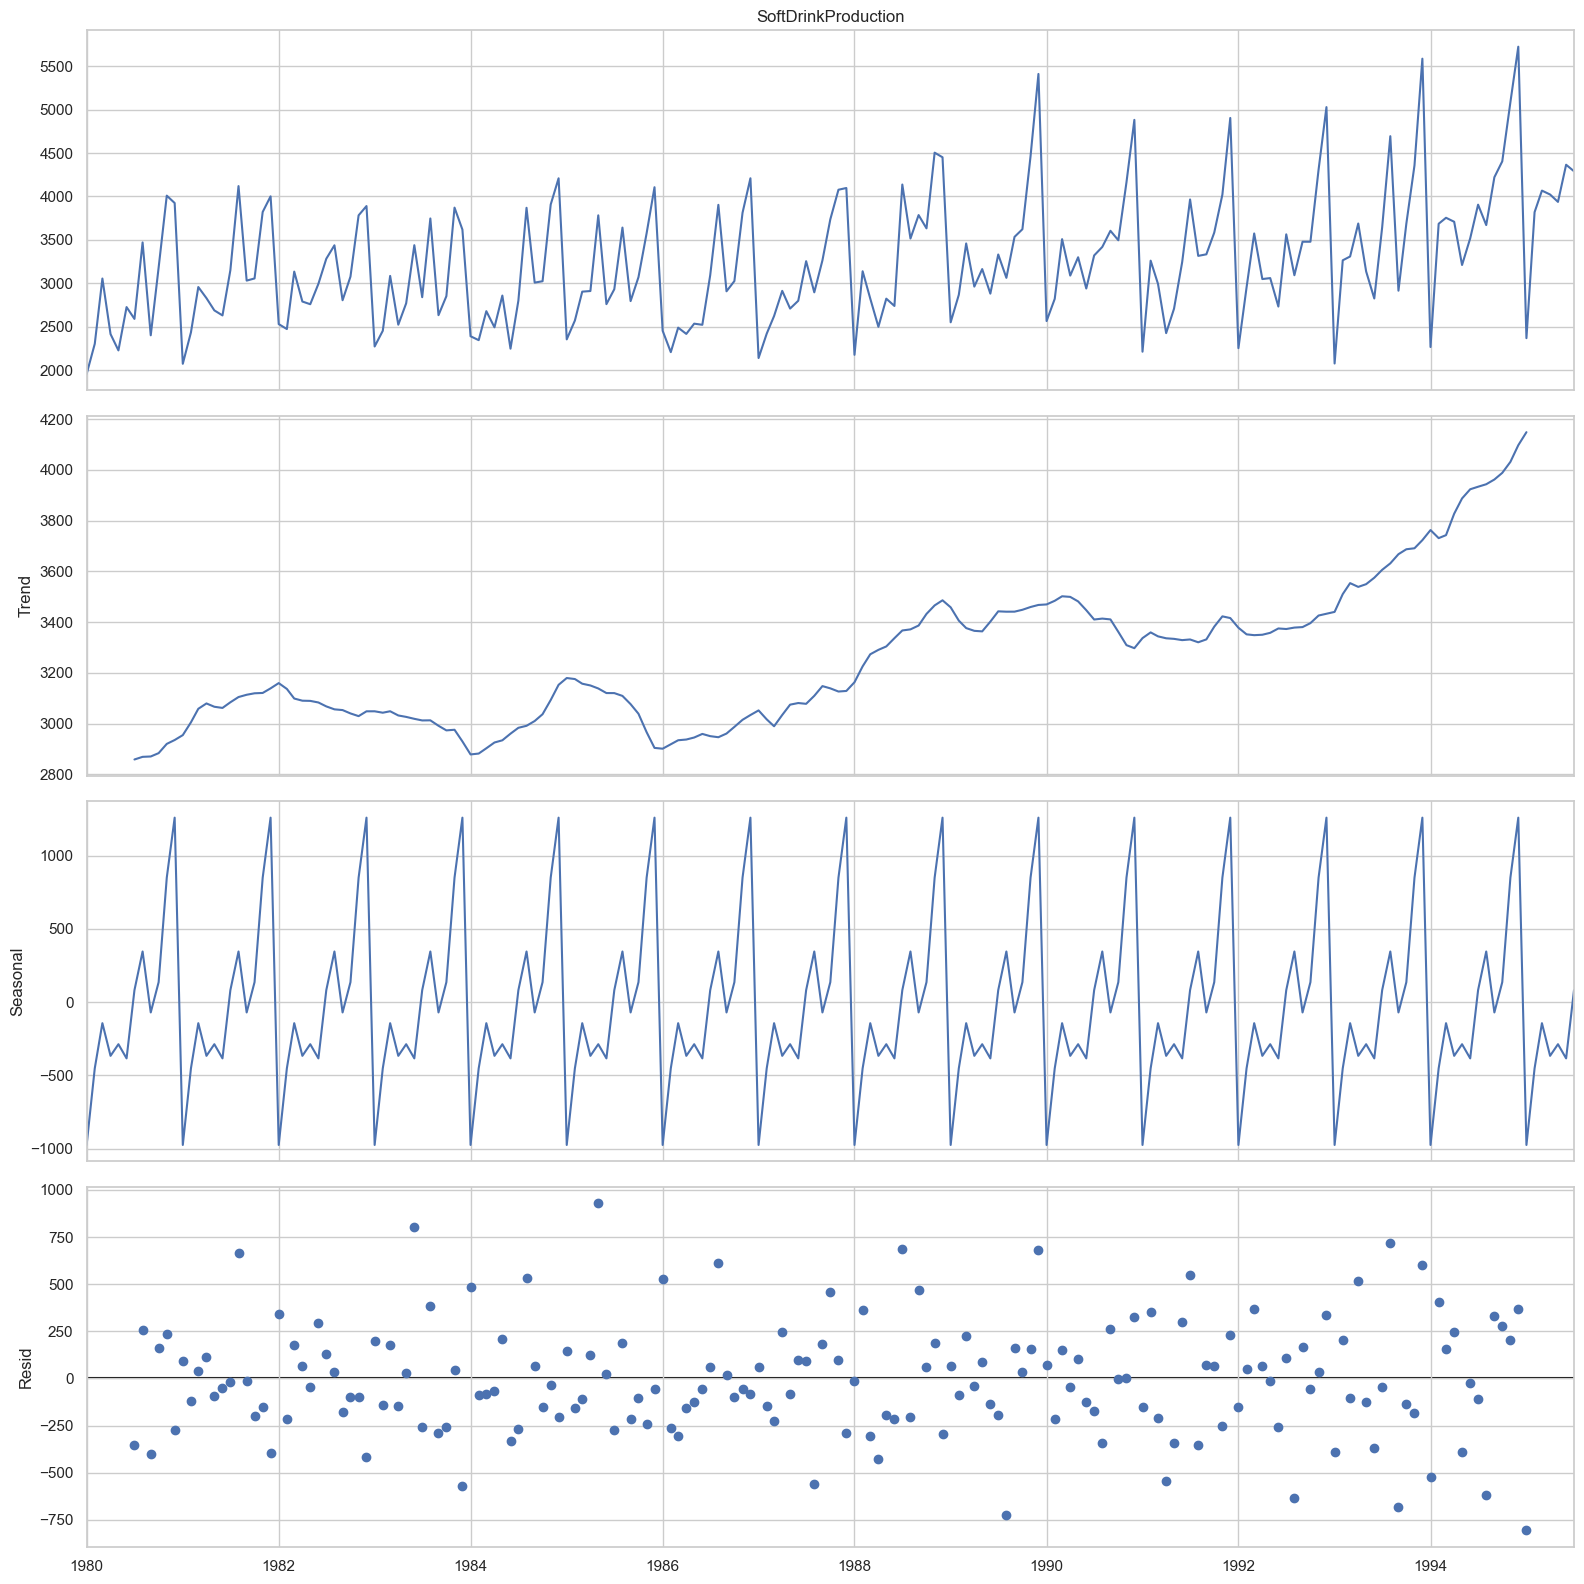

In [35]:
decomposition2 = seasonal_decompose(df2,model='additive')
import matplotlib.pyplot as plt 

#fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,8))
#decomposition2.trend.plot(ax=ax1)
#decomposition2.seasonal.plot(ax=ax2)
#decomposition2.resid.plot(ax=ax3)
plt.rcParams["figure.figsize"] = (16,16)
decomposition2.plot();

In [36]:
df2 = df2.replace(to_replace=np.NaN,value=df2.mean())

<AxesSubplot:xlabel='YearMonth'>

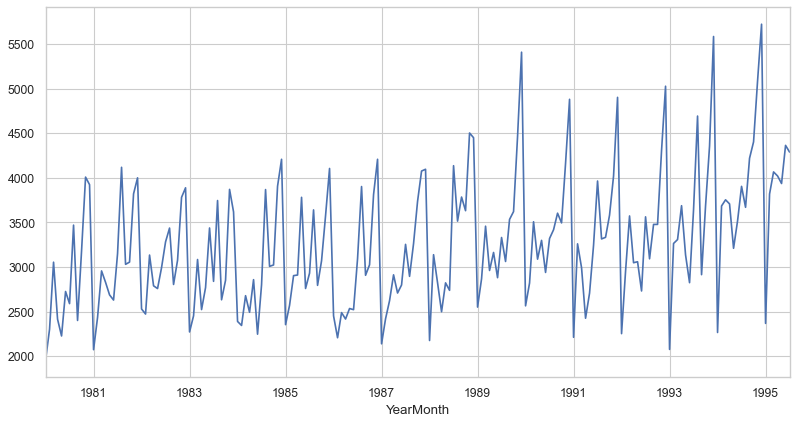

In [37]:
figure(figsize=(12, 6), dpi=80)
df2.plot()

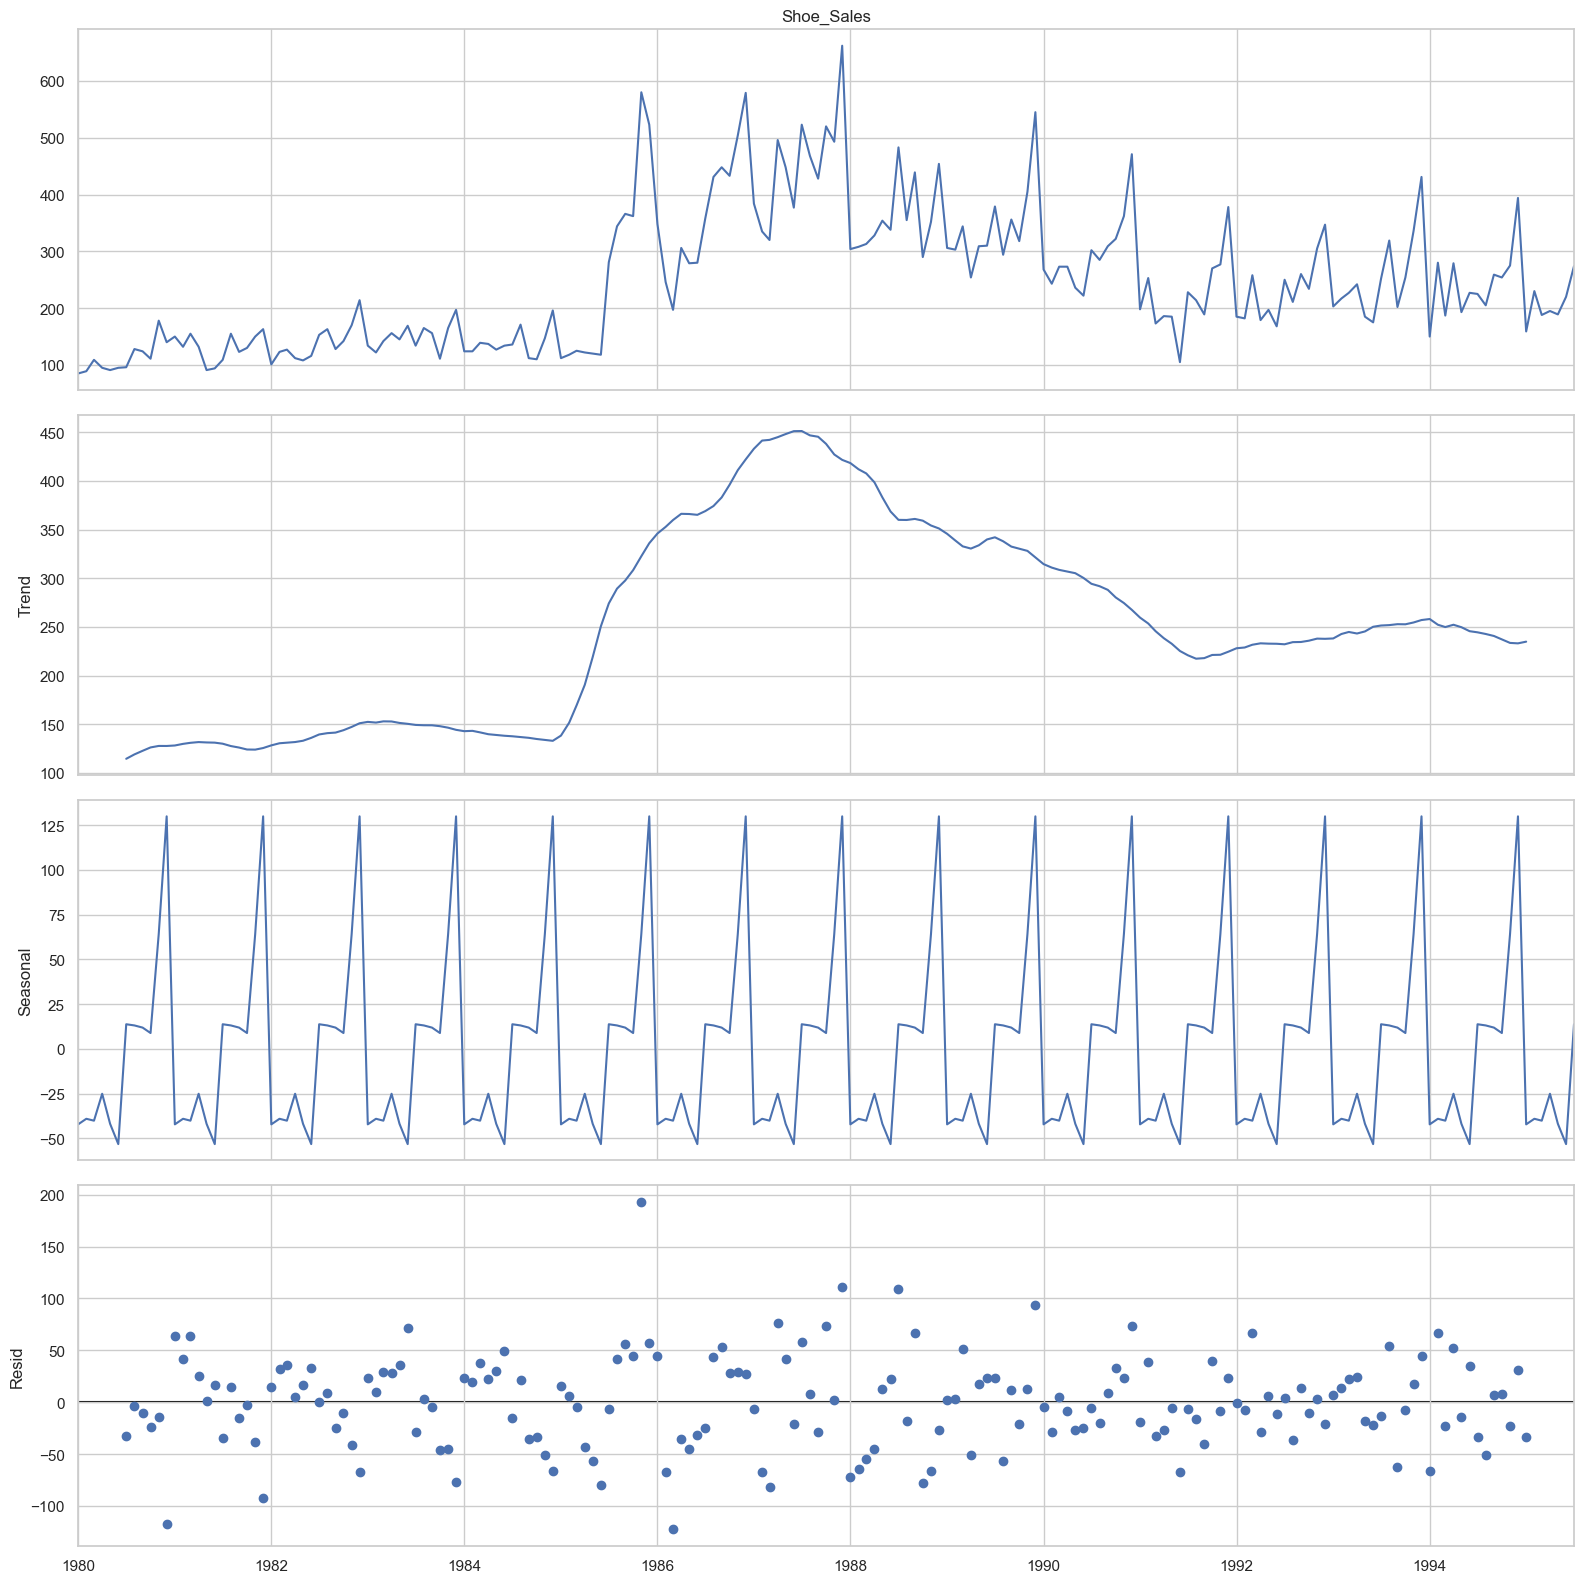

In [38]:
decomposition2 = seasonal_decompose(df1,model='additive')
import matplotlib.pyplot as plt 

#fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,8))
#decomposition2.trend.plot(ax=ax1)
#decomposition2.seasonal.plot(ax=ax2)
#decomposition2.resid.plot(ax=ax3)
plt.rcParams["figure.figsize"] = (16,16)
decomposition2.plot();

### Split the data into train and test and plot the training and test data.
Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [39]:
trainshoe=df_2[df_2.index.year < 1991]
testshoe=df_2[df_2.index.year >= 1991]

In [40]:
print('First few rows of Training Data','\n',trainshoe.head(),'\n')
print('Last few rows of Training Data','\n',trainshoe.tail(),'\n')
print('First few rows of Test Data','\n',testshoe.head(),'\n')
print('Last few rows of Test Data','\n',testshoe.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91 

Last few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1990-08-31         285
1990-09-30         309
1990-10-31         322
1990-11-30         362
1990-12-31         471 

First few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1991-01-31         198
1991-02-28         253
1991-03-31         173
1991-04-30         186
1991-05-31         185 

Last few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1995-02-28         230
1995-03-31         188
1995-04-30         195
1995-05-31         189
1995-06-30         220 



In [41]:
print(trainshoe.shape)
print(testshoe.shape)

(132, 1)
(54, 1)


## Check for stationarity of the whole Time Series data.

In [42]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

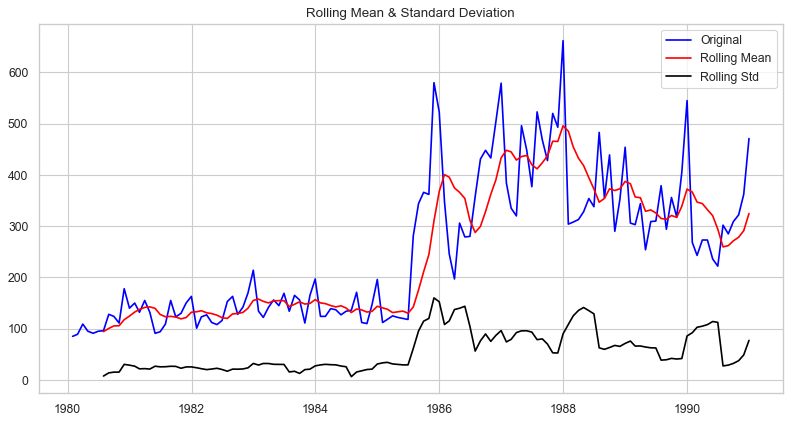

Results of Dickey-Fuller Test:
Test Statistic                  -1.361129
p-value                          0.600763
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [43]:
figure(figsize=(12, 6), dpi=80)
test_stationarity(trainshoe)

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

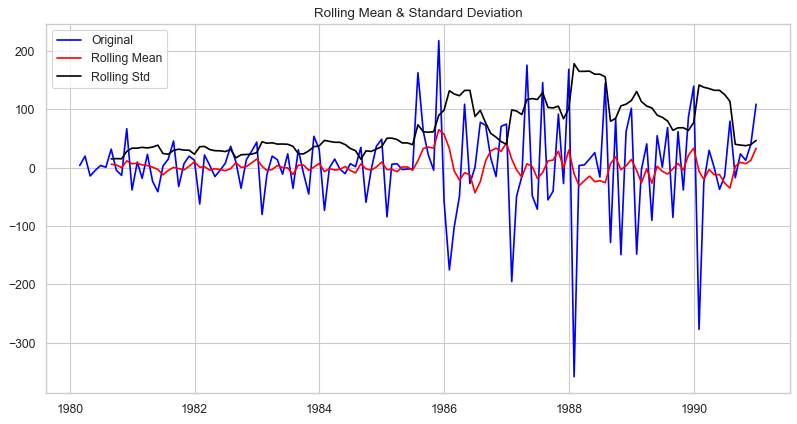

Results of Dickey-Fuller Test:
Test Statistic                  -3.144211
p-value                          0.023450
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [44]:
figure(figsize=(12, 6), dpi=80)
test_stationarity(trainshoe.diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

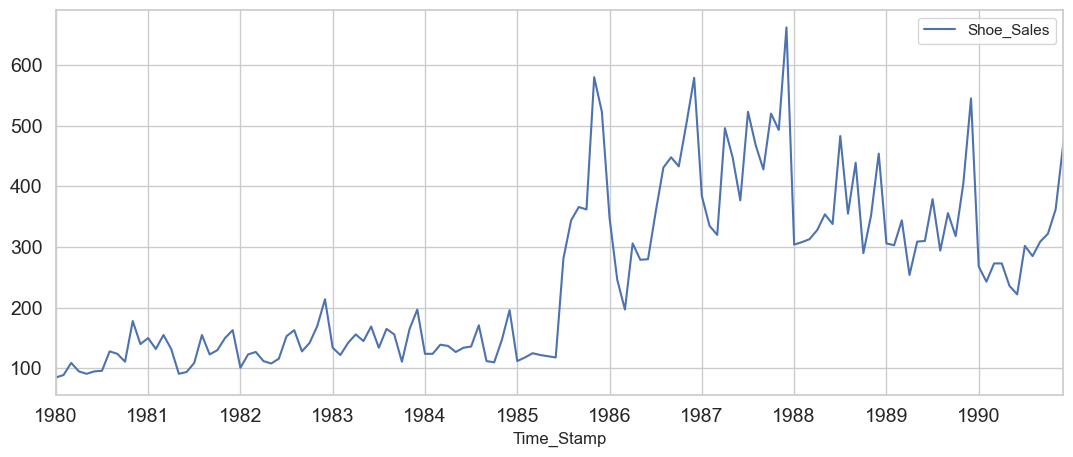

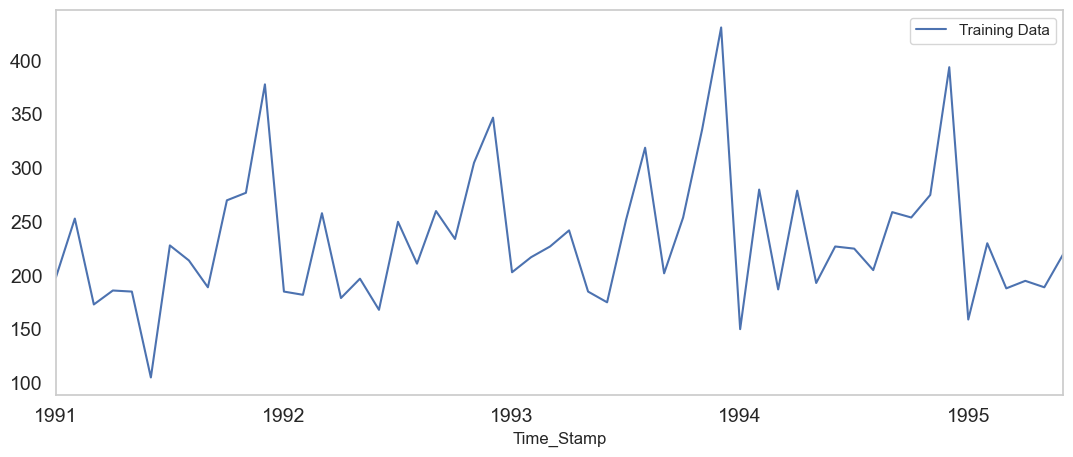

In [45]:
trainshoe.plot(figsize=(13,5), fontsize=14)
testshoe.plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Linear Regression Model

In [46]:
train_time = [i+1 for i in range(len(trainshoe))]
test_time = [i+133 for i in range(len(testshoe))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [47]:
LinearRegression_train = trainshoe.copy()
LinearRegression_test = testshoe.copy()

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1980-01-31          85     1
1980-02-29          89     2
1980-03-31         109     3
1980-04-30          95     4
1980-05-31          91     5 

Last few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1990-08-31         285   128
1990-09-30         309   129
1990-10-31         322   130
1990-11-30         362   131
1990-12-31         471   132 

First few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1991-01-31         198   133
1991-02-28         253   134
1991-03-31         173   135
1991-04-30         186   136
1991-05-31         185   137 

Last few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1995-02-28         230   182
1995-03-31         188   183
1995-04-30         195   184
1995-05-31         189   185
1995-06-30         220   186 



In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'])

LinearRegression()

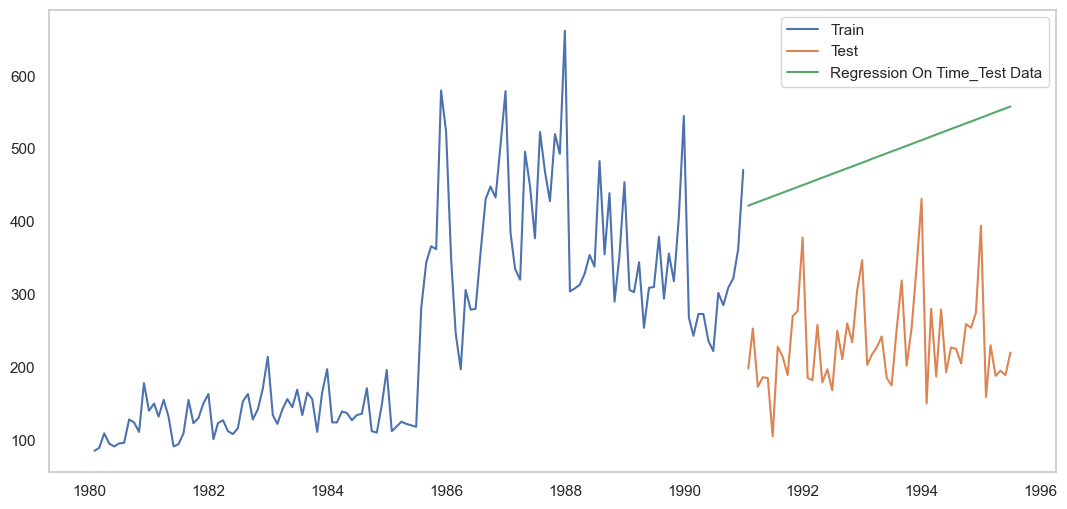

In [53]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( trainshoe['Shoe_Sales'], label='Train')
plt.plot(testshoe['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [54]:
from sklearn import metrics

In [55]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(testshoe['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 265.886


In [56]:
testshoe.isnull().sum()

Shoe_Sales    0
dtype: int64

In [57]:
testshoe = testshoe.fillna(method='ffill')
df_2 = df_2.fillna(method='ffill')

In [58]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  265.885796

## Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 

In [59]:
NaiveModel_train = trainshoe.copy()
NaiveModel_test = testshoe.copy()

In [60]:
trainshoe['Shoe_Sales'][len(np.asarray(trainshoe['Shoe_Sales']))-1]

471

In [61]:
NaiveModel_test['naive'] = np.asarray(trainshoe['Shoe_Sales'])[len(np.asarray(trainshoe['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    471
1991-02-28    471
1991-03-31    471
1991-04-30    471
1991-05-31    471
Name: naive, dtype: int64

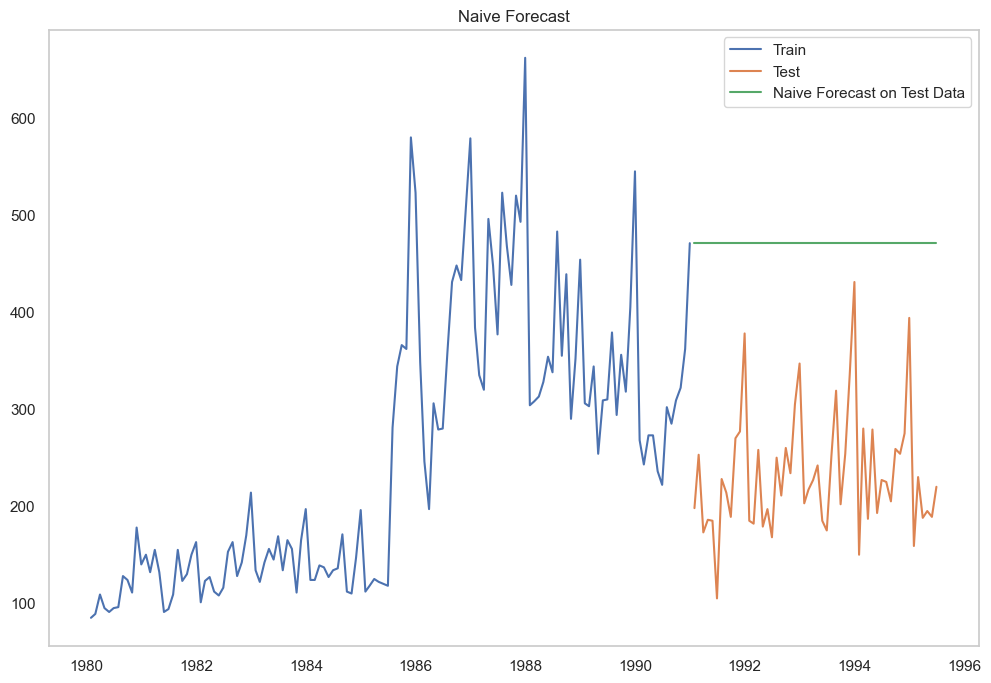

In [62]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(testshoe['Shoe_Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation Naive Bayes

In [63]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(testshoe['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 245.924


In [64]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  265.885796
NaiveModel        245.923656

## Method 3: Simple Average

In [65]:
SimpleAverage_train = trainshoe.copy()
SimpleAverage_test = testshoe.copy()

In [66]:
SimpleAverage_test['mean_forecast'] = trainshoe['Shoe_Sales'].mean()
SimpleAverage_test.head()

Shoe_Sales  mean_forecast
Time_Stamp                           
1991-01-31         198     250.575758
1991-02-28         253     250.575758
1991-03-31         173     250.575758
1991-04-30         186     250.575758
1991-05-31         185     250.575758

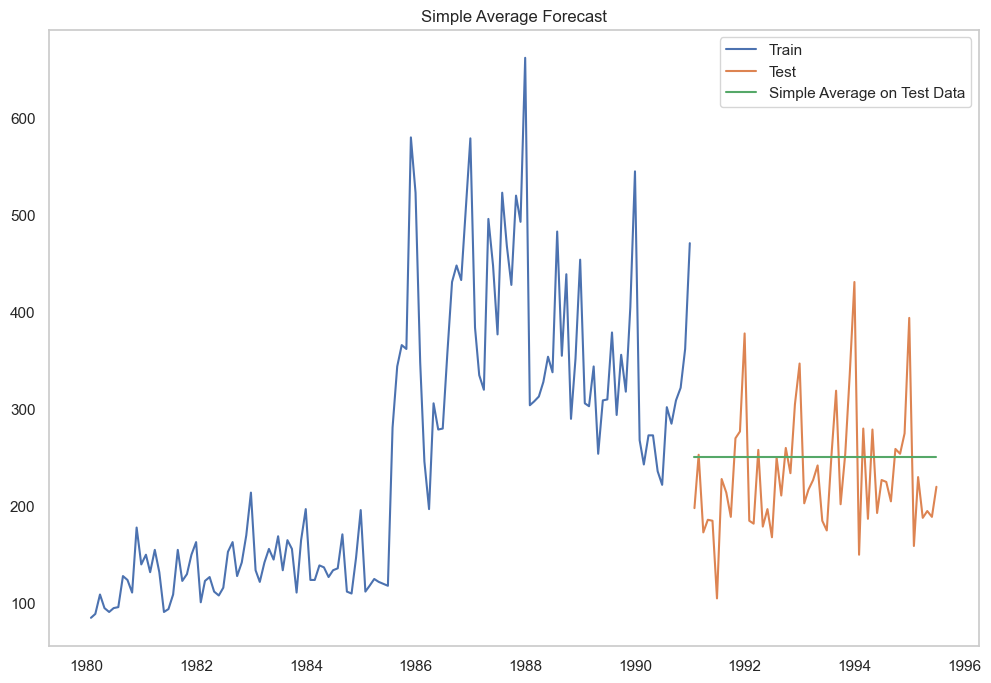

In [67]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation Simple Average

In [68]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(testshoe['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 64.496


In [69]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime      265.885796
NaiveModel            245.923656
Simple Average Model   64.495577

## Method 4: Moving Average(MA)

In [70]:
MovingAverage = df_2.copy()
MovingAverage.head()

Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91

In [71]:

MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head(10)

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                            
1980-01-31          85         NaN         NaN         NaN         NaN
1980-02-29          89        87.0         NaN         NaN         NaN
1980-03-31         109        99.0         NaN         NaN         NaN
1980-04-30          95       102.0       94.50         NaN         NaN
1980-05-31          91        93.0       96.00         NaN         NaN
1980-06-30          95        93.0       97.50   94.000000         NaN
1980-07-31          96        95.5       94.25   95.833333         NaN
1980-08-31         128       112.0      102.50  102.333333         NaN
1980-09-30         124       126.0      110.75  104.833333  101.333333
1980-10-31         111       117.5      114.75  107.500000  104.222222

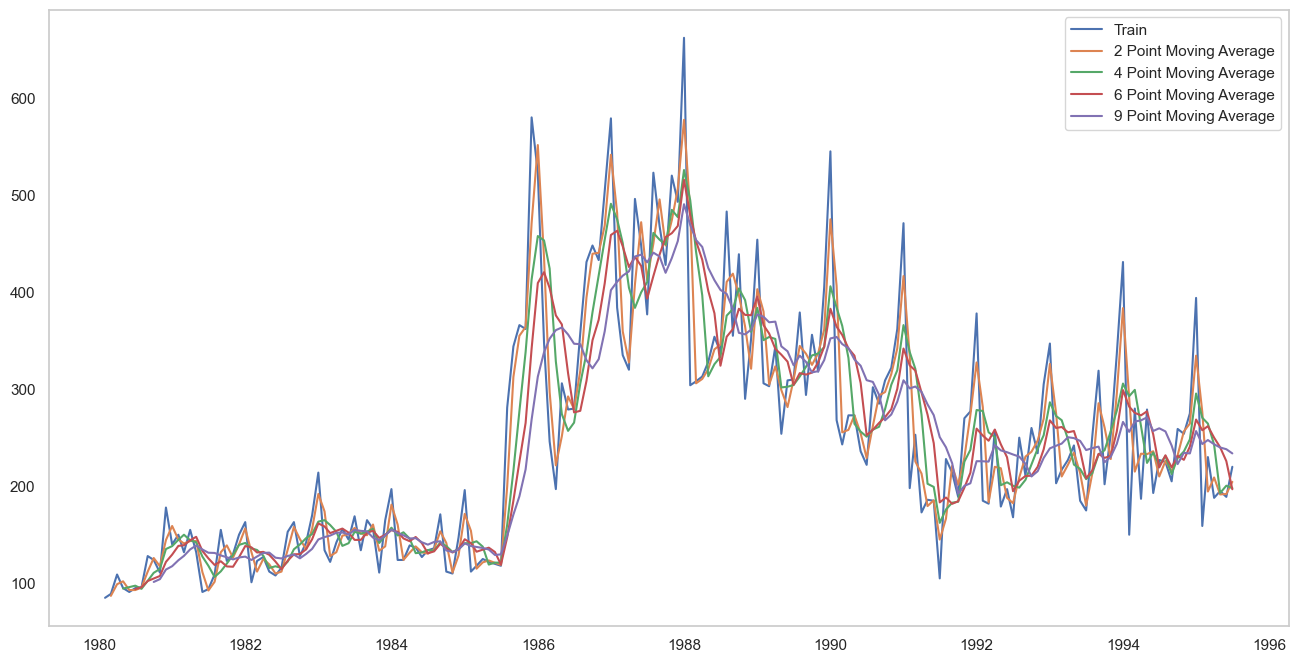

In [72]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Shoe_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [73]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df_2.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df_2.index.year >= 1991]

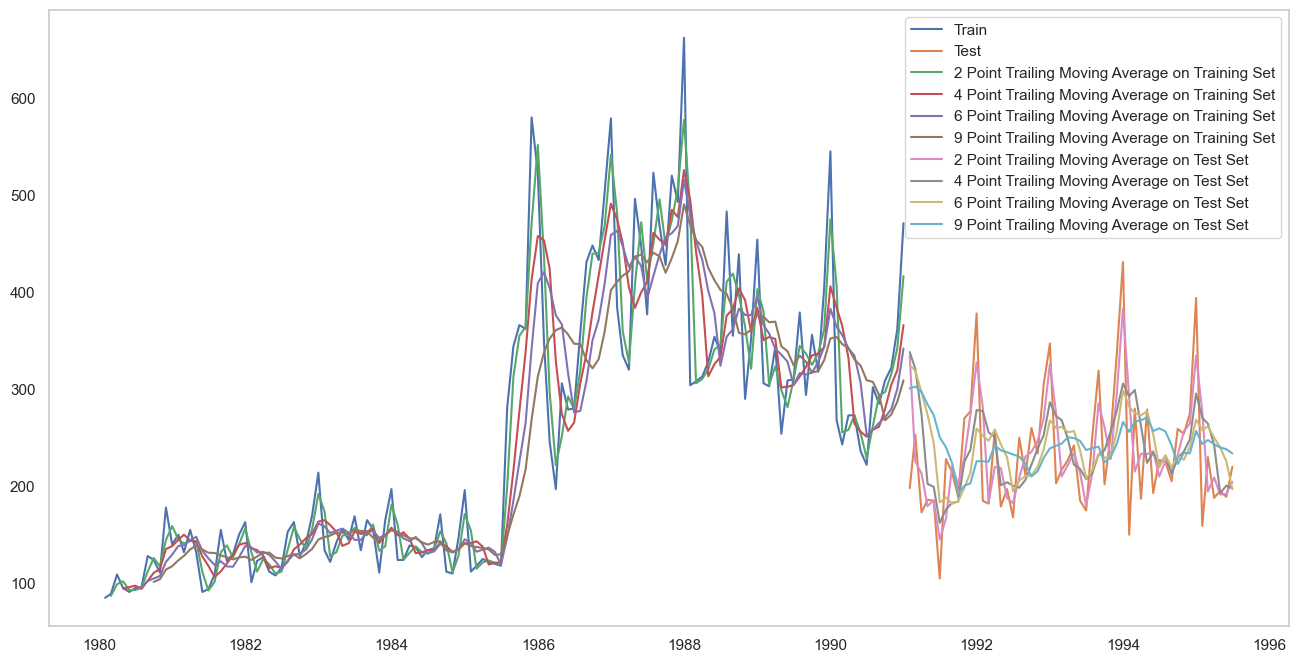

In [74]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation - Done on the Test Data

In [75]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(testshoe['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(testshoe['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(testshoe['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(testshoe['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 46.226
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 57.933
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 63.554
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 68.152 


In [76]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2 point Trailing Moving Average','4 point Trailing Moving Average'
                                   ,'6 point Trailing Moving Average','9 point Trailing Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime                 265.885796
NaiveModel                       245.923656
Simple Average Model              64.495577
2 point Trailing Moving Average   46.226445
4 point Trailing Moving Average   57.933291
6 point Trailing Moving Average   63.553528
9 point Trailing Moving Average   68.151939

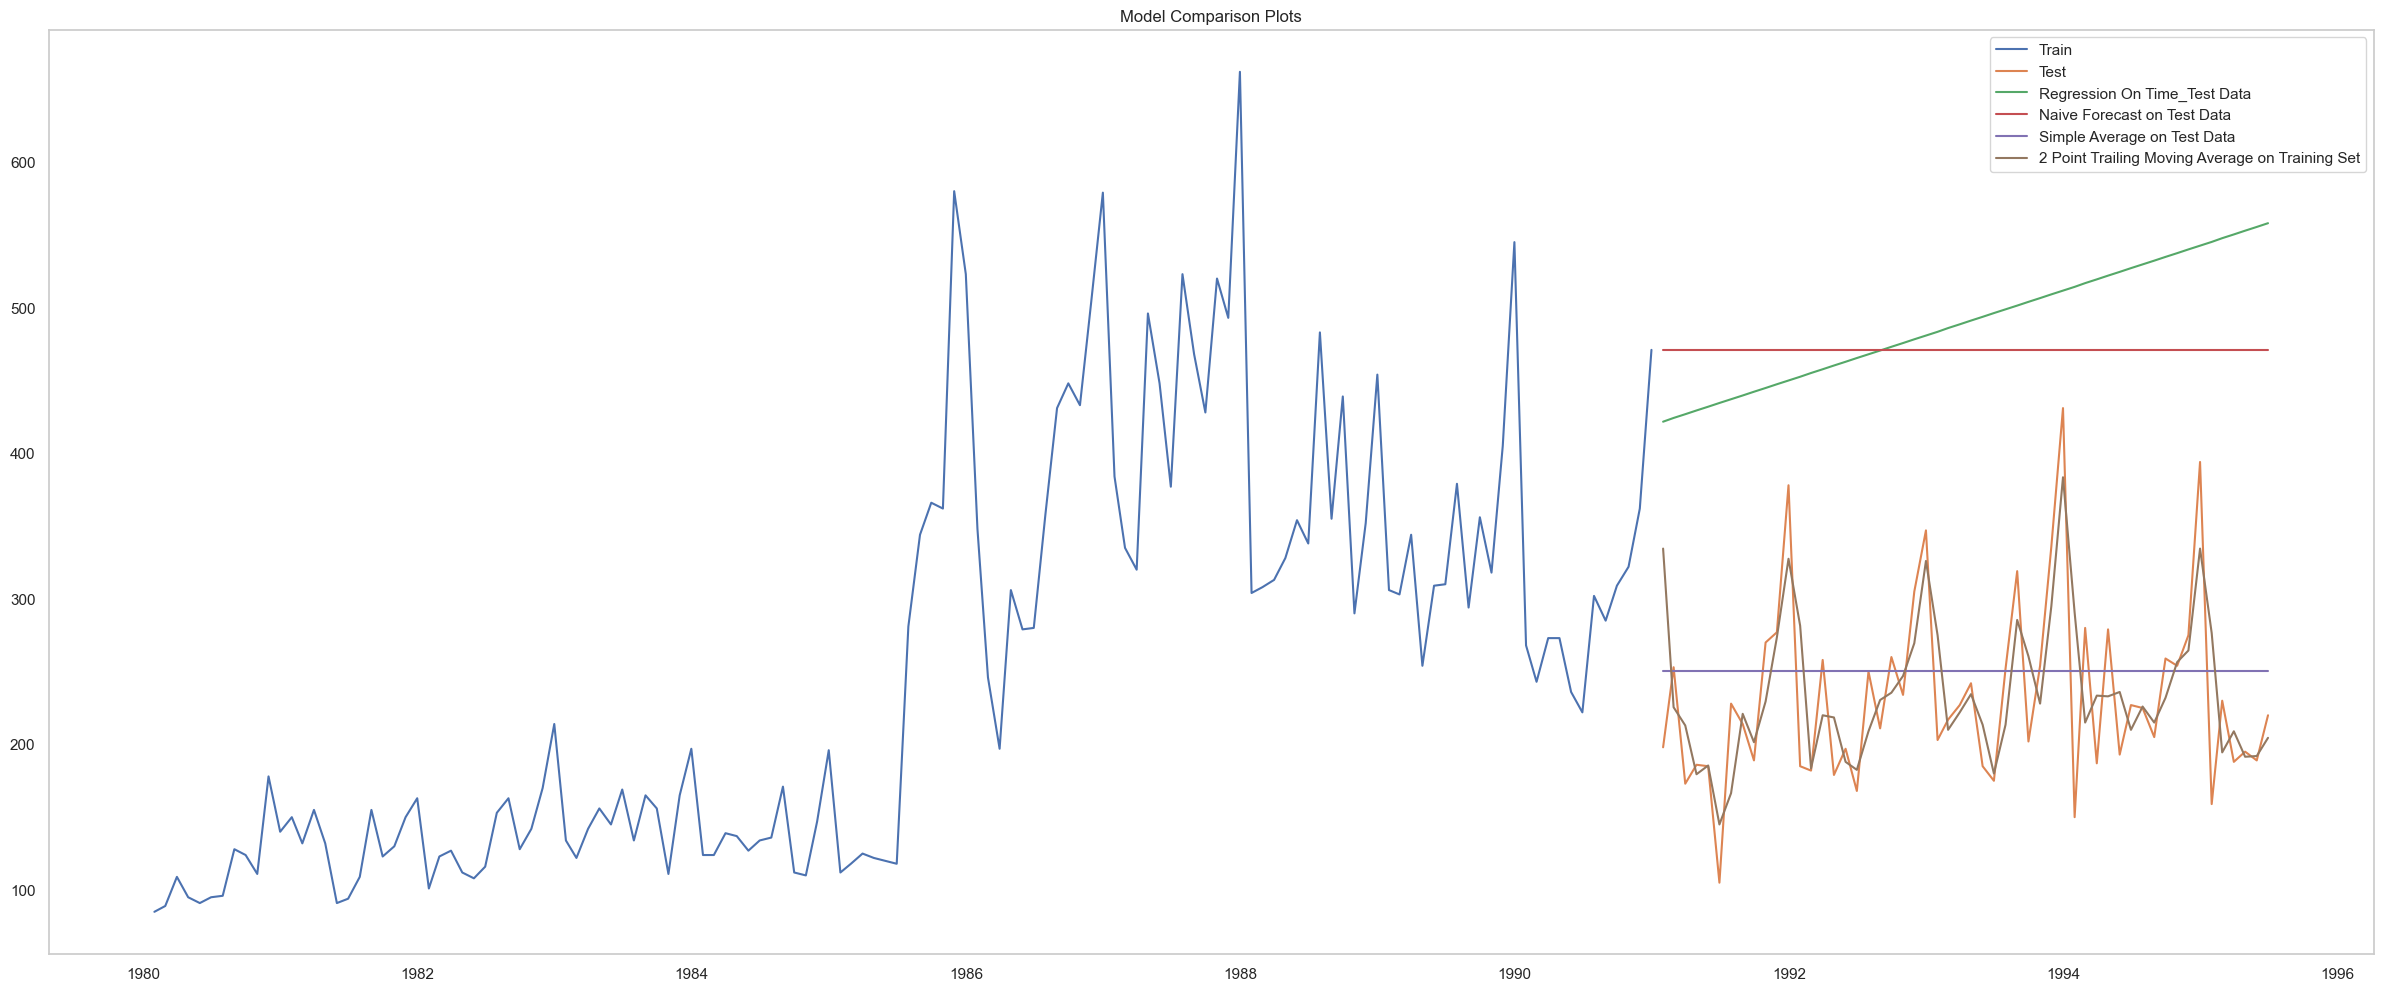

In [77]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(trainshoe['Shoe_Sales'], label='Train')
plt.plot(testshoe['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [78]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [79]:
SES_train = trainshoe.copy()
SES_test = testshoe.copy()

In [80]:
model_SES = SimpleExpSmoothing(SES_train["Shoe_Sales"])

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [81]:
model_SES_autofit = model_SES.fit(optimized=True)

In [82]:
model_SES_autofit.params

{'smoothing_level': 0.6051903749099211,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 85.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [83]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(testshoe))
SES_test.head()

Shoe_Sales     predict
Time_Stamp                        
1991-01-31         198  420.251632
1991-02-28         253  420.251632
1991-03-31         173  420.251632
1991-04-30         186  420.251632
1991-05-31         185  420.251632

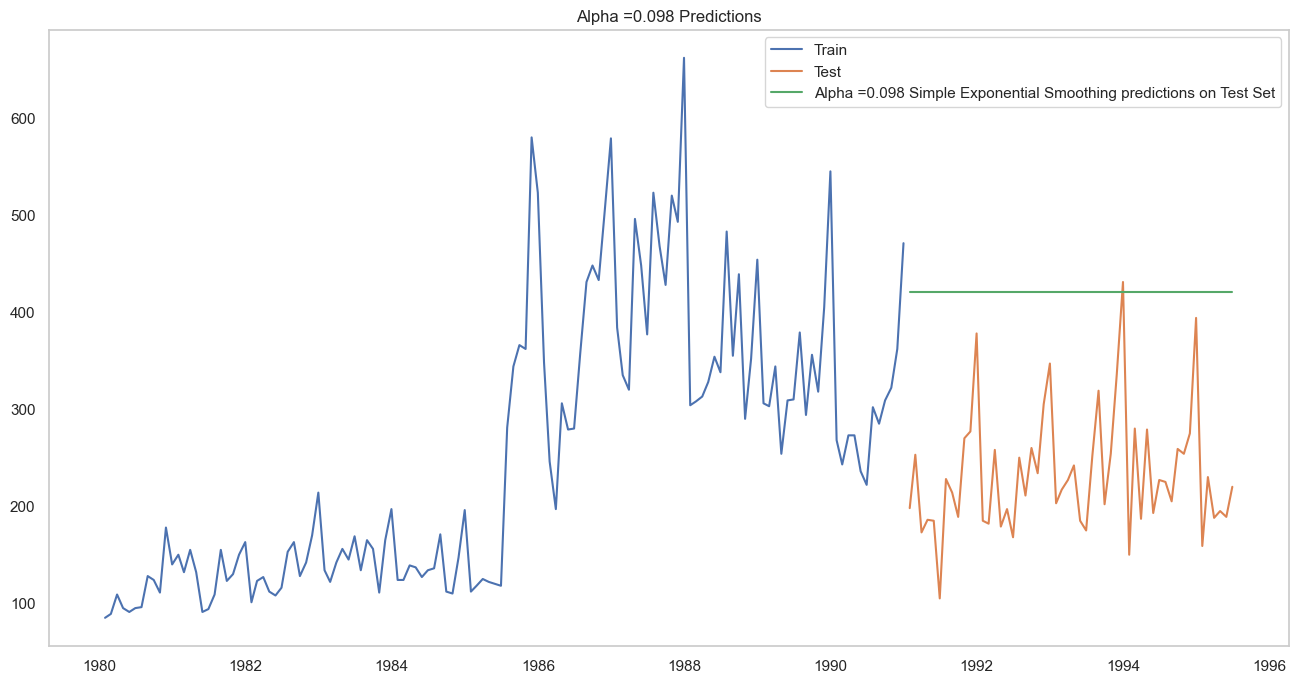

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

### Model Evaluation for  𝛼  = 0.09 : Simple Exponential Smoothing

In [85]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.09 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.09 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 197.234


In [86]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                          265.885796
NaiveModel                                245.923656
Simple Average Model                       64.495577
2 point Trailing Moving Average            46.226445
4 point Trailing Moving Average            57.933291
6 point Trailing Moving Average            63.553528
9 point Trailing Moving Average            68.151939
Alpha=0.098,Simple Exponential Smoothing  197.234320

### Testing the Shoe Dataset with different Alpha Values

In [87]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [88]:
for i in np.arange(0.0,0.09,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(testshoe))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Shoe_Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [89]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE   Test RMSE
1          0.01  157.669937   62.069864
2          0.02  129.357024   88.237298
3          0.03  114.179333  108.941661
4          0.04  105.087995  117.565152
8          0.08   88.846007  117.990046
7          0.07   91.431689  119.053303
6          0.06   94.719282  120.019154
5          0.05   99.053593  120.096013
0          0.00  215.657206  160.521142

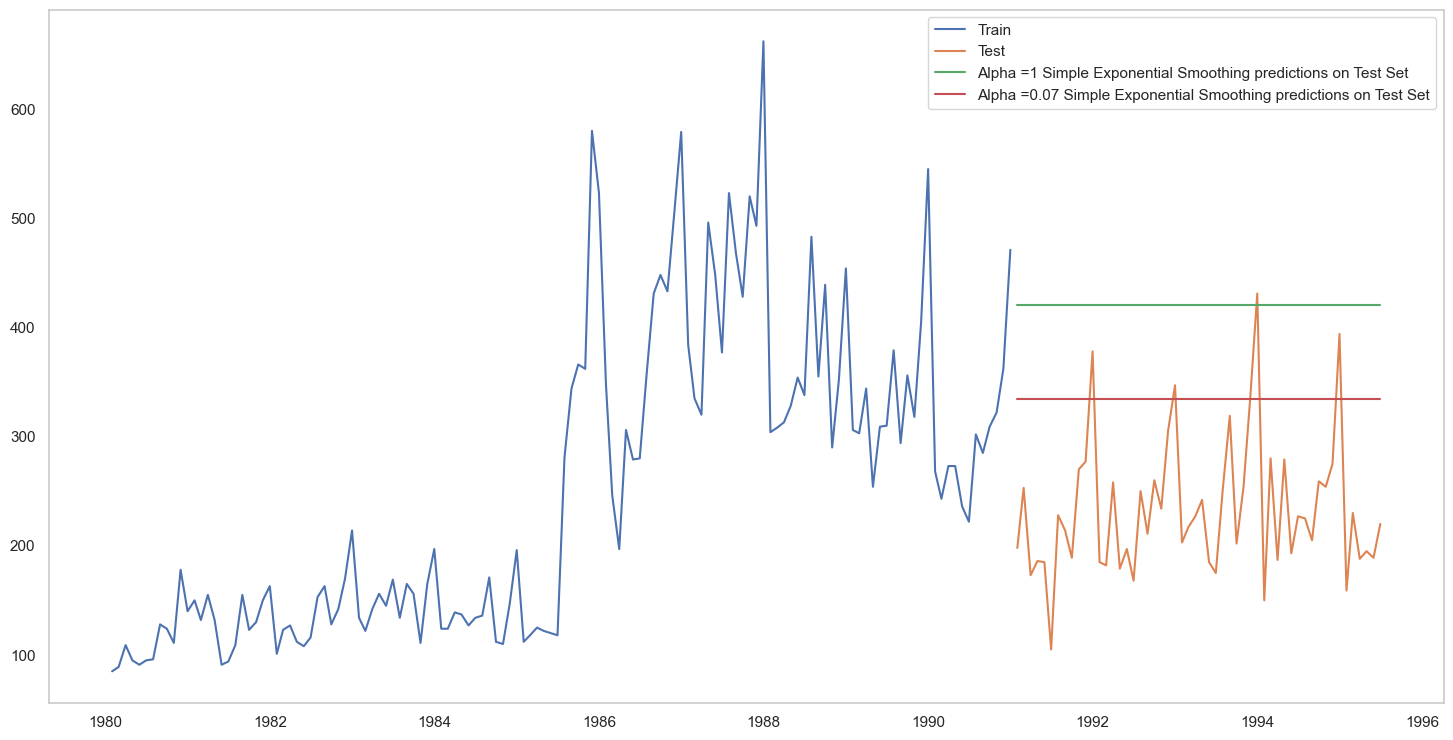

In [90]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.07], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [91]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.07,Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                          265.885796
NaiveModel                                245.923656
Simple Average Model                       64.495577
2 point Trailing Moving Average            46.226445
4 point Trailing Moving Average            57.933291
6 point Trailing Moving Average            63.553528
9 point Trailing Moving Average            68.151939
Alpha=0.098,Simple Exponential Smoothing  197.234320
Alpha=0.07,Simple Exponential Smoothing    62.069864

## Method 6: Double Exponential Smoothing (Holt's Model)

In [92]:
DES_train = trainshoe.copy()
DES_test = testshoe.copy()

In [93]:
model_DES = Holt(DES_train['Shoe_Sales'])

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [94]:
model_DES_autofit = model_DES.fit(optimized=True)

In [95]:
model_DES_autofit.params

{'smoothing_level': 0.6033810242585689,
 'smoothing_trend': 9.925434907792749e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 85.0,
 'initial_trend': 4.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(testshoe))
DES_test.head()

Shoe_Sales     predict
Time_Stamp                        
1991-01-31         198  426.564783
1991-02-28         253  430.546010
1991-03-31         173  434.527238
1991-04-30         186  438.508465
1991-05-31         185  442.489692

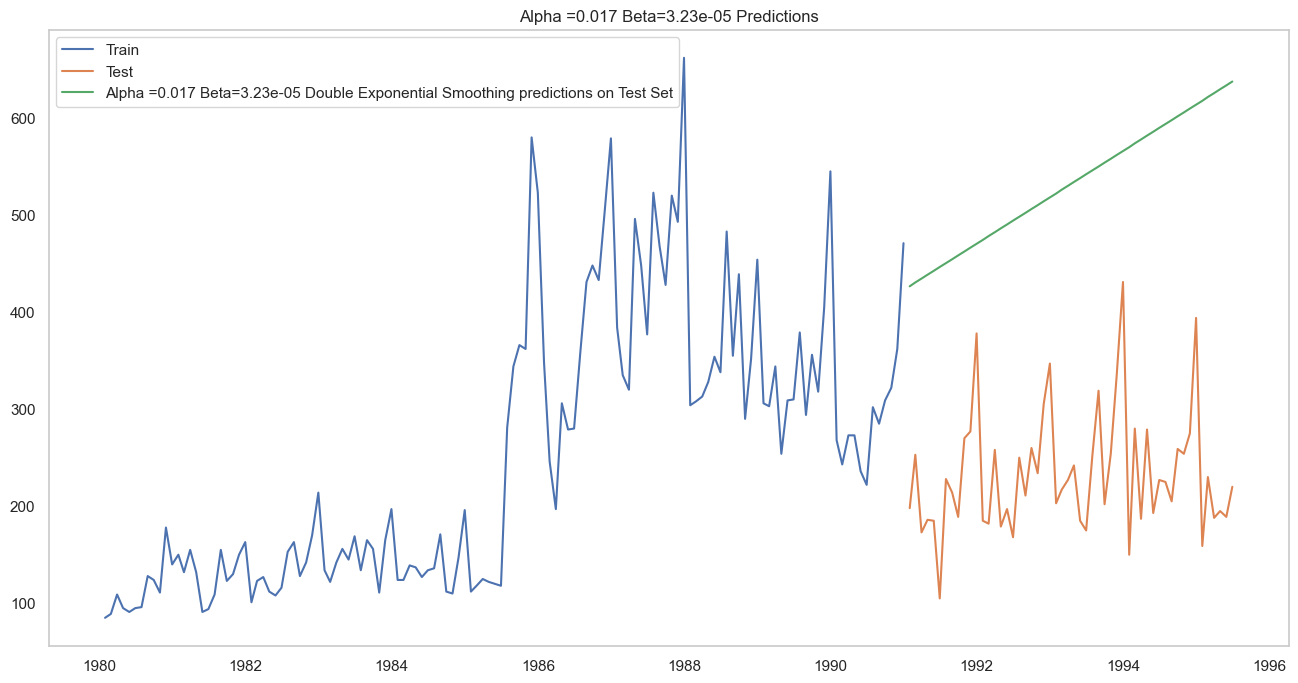

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.017 Beta=3.23e-05 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.017 Beta=3.23e-05 Predictions');

In [98]:
rmse_model5_test_1 = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict'],squared=False)
print("For Alpha =0.017 Beta=3.23e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.017 Beta=3.23e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 309.876


In [99]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]}
                           ,index=['Alpha =0.017 Beta=3.23e-05 Double Exponential Smoothing Model'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    265.885796
NaiveModel                                          245.923656
Simple Average Model                                 64.495577
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
6 point Trailing Moving Average                      63.553528
9 point Trailing Moving Average                      68.151939
Alpha=0.098,Simple Exponential Smoothing            197.234320
Alpha=0.07,Simple Exponential Smoothing              62.069864
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368

In [100]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [101]:
for i in np.arange(0.01,1.1,0.01):
    for j in np.arange(0.01,1.1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(testshoe))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Shoe_Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [102]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE    Test RMSE
0              0.01         0.01  115.705064   359.983936
1              0.01         0.02  111.103408   323.589222
2              0.01         0.03  108.122657   297.145817
3              0.01         0.04  106.420741   278.863179
4              0.01         0.05  105.700100   267.171859
...             ...          ...         ...          ...
11876          1.09         1.05  140.523671  3786.692178
11877          1.09         1.06  141.682040  3799.535705
11878          1.09         1.07  142.863143  3811.594498
11879          1.09         1.08  144.067626  3822.830676
11880          1.09         1.09  145.296158  3833.205144

[11881 rows x 4 columns]

In [103]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
458          0.05         0.23  101.190822  61.459830
563          0.06         0.19   96.817489  63.206794
648          0.06         1.04  101.543663  63.218663
647          0.06         1.03  101.233218  63.429833
646          0.06         1.02  100.921404  64.771262

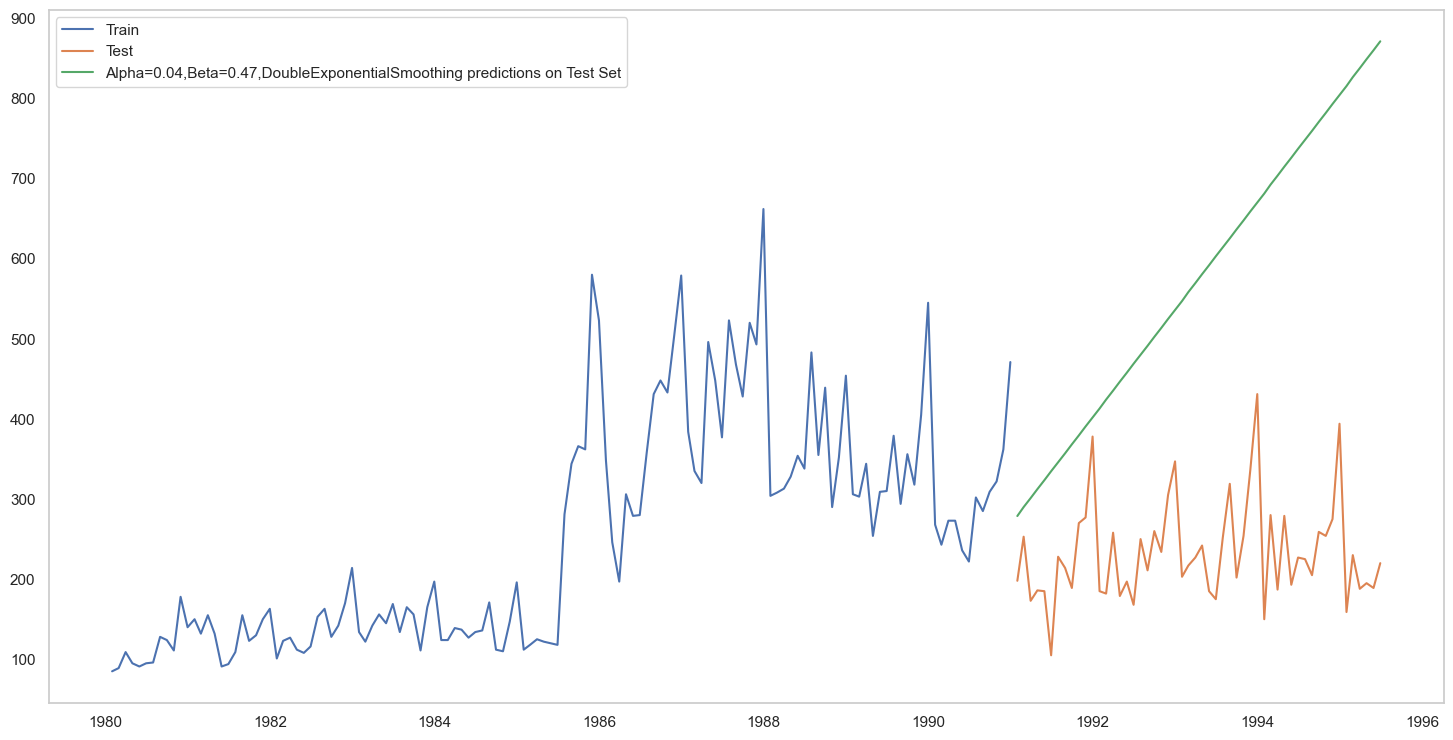

In [104]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_test['predict', 0.04, 0.4], label='Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [105]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.04,Beta=0.4,Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    265.885796
NaiveModel                                          245.923656
Simple Average Model                                 64.495577
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
6 point Trailing Moving Average                      63.553528
9 point Trailing Moving Average                      68.151939
Alpha=0.098,Simple Exponential Smoothing            197.234320
Alpha=0.07,Simple Exponential Smoothing              62.069864
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [161]:
TES_train = trainshoe.copy()
TES_test = testshoe.copy()

In [162]:
model_TES = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='additive',seasonal='multiplicative',freq='M')

In [163]:
model_TES_autofit = model_TES.fit()

In [164]:
model_TES_autofit.params

{'smoothing_level': 0.6009868693481561,
 'smoothing_trend': 0.006156909298740214,
 'smoothing_seasonal': 0.17574086651628373,
 'damping_trend': nan,
 'initial_level': 107.69608365185793,
 'initial_trend': 0.4232661374510192,
 'initial_seasons': array([1.09755031, 0.99553258, 1.21255323, 1.38802376, 1.29807702,
        1.10890294, 1.22578614, 1.43128568, 1.70333676, 1.4459007 ,
        1.7104661 , 1.94336275]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [165]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(testshoe))
TES_test.head()

Shoe_Sales  auto_predict
Time_Stamp                          
1991-01-31         198    263.531912
1991-02-28         253    245.139749
1991-03-31         173    259.792279
1991-04-30         186    276.337606
1991-05-31         185    272.442200

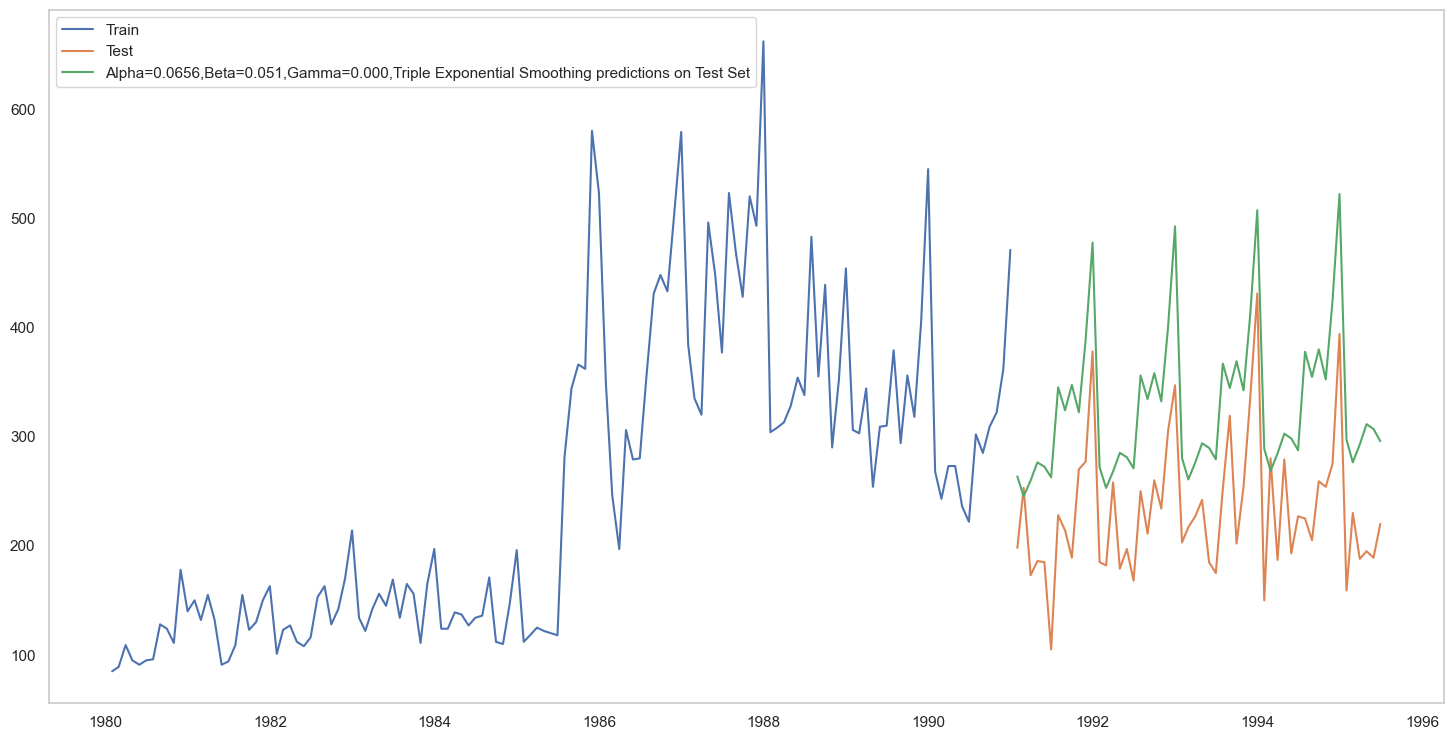

In [166]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0656,Beta=0.051,Gamma=0.000,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [167]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.0656, Beta=0.051, Gamma=0.000, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.0656, Beta=0.051, Gamma=0.000, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 101.873


In [168]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    265.885796
NaiveModel                                          245.923656
Simple Average Model                                 64.495577
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
6 point Trailing Moving Average                      63.553528
9 point Trailing Moving Average                      68.151939
Alpha=0.098,Simple Exponential Smoothing            197.234320
Alpha=0.07,Simple Exponential Smoothing              62.069864
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponenti...   41.558318
ARIMA (1,1,1)                                       143.659245
SARIMA (1,1,2)(2,0,2,6)                              55.579285
SARIMA (0,1,2)(2,0,2,12)                             56.717121
Manual ARIMA (4,1,2)                                143.477550
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986

In [169]:
resultsDf

Test RMSE
RegressionOnTime                                    265.885796
NaiveModel                                          245.923656
Simple Average Model                                 64.495577
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
6 point Trailing Moving Average                      63.553528
9 point Trailing Moving Average                      68.151939
Alpha=0.098,Simple Exponential Smoothing            197.234320
Alpha=0.07,Simple Exponential Smoothing              62.069864
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponenti...   41.558318
ARIMA (1,1,1)                                       143.659245
SARIMA (1,1,2)(2,0,2,6)                              55.579285
SARIMA (0,1,2)(2,0,2,12)                             56.717121
Manual ARIMA (4,1,2)                                143.477550
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986

In [115]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [116]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(testshoe))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [117]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1     70.327913    103.686215
1             0.1          0.1           0.2     69.793382    101.142419
2             0.1          0.1           0.3     71.074232     94.854455
3             0.1          0.1           0.4     73.339344     87.134240
4             0.1          0.1           0.5     76.279414     79.718751
..            ...          ...           ...           ...           ...
724           0.9          0.9           0.5  11493.408963  95927.990532
725           0.9          0.9           0.6   1779.732298  89441.016151
726           0.9          0.9           0.7   7491.969992  43368.651646
727           0.9          0.9           0.8  10676.573872  10462.190475
728           0.9          0.9           0.9   4579.614813  11172.455074

[729 rows x 5 columns]

In [118]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
46           0.1          0.6           0.2   74.696236  41.558318
40           0.1          0.5           0.5   94.006921  44.251422
45           0.1          0.6           0.1   70.879943  44.413950
34           0.1          0.4           0.8  120.751189  44.989001
93           0.2          0.2           0.4   66.566078  47.138977

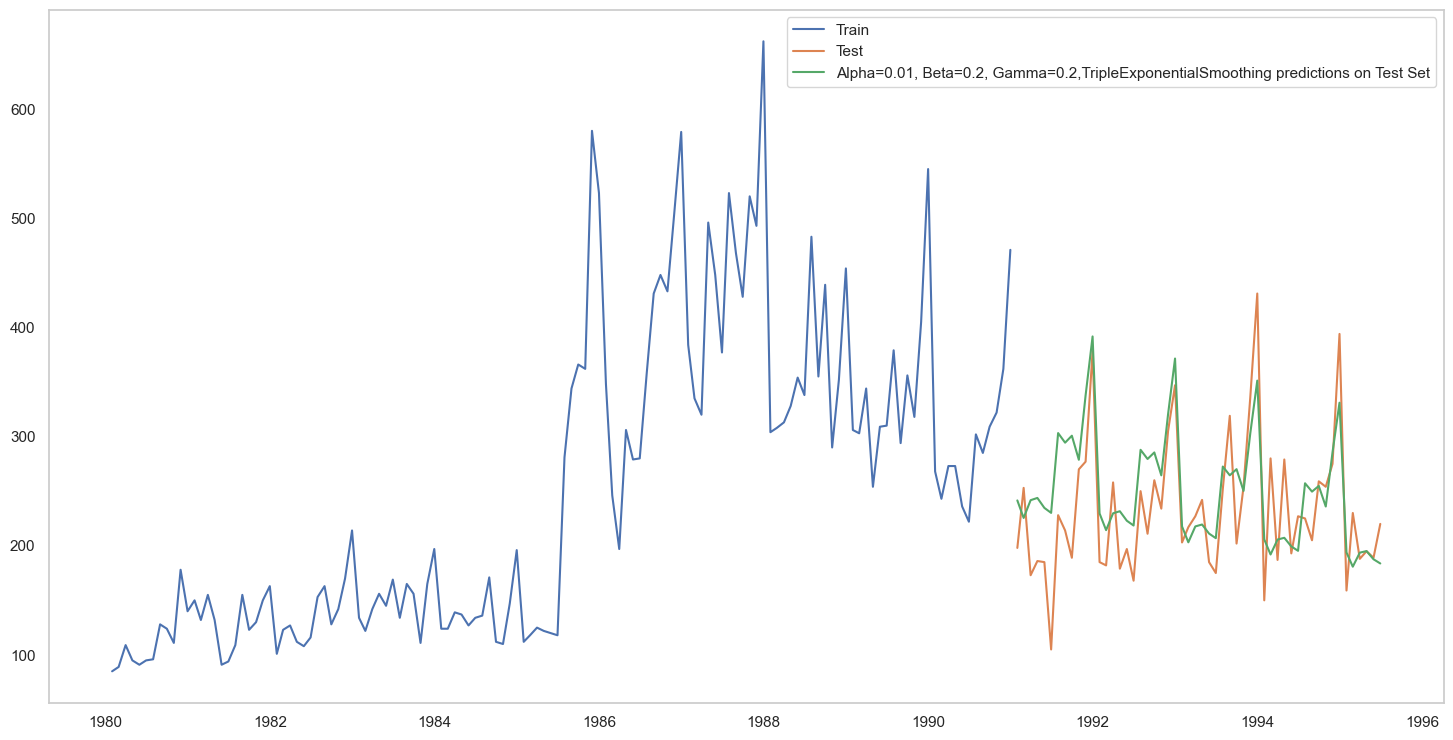

In [119]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.01, Beta=0.2, Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [120]:
TES_test.to_csv('predict.csv')

In [121]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

resultsDf1 = resultsDf

##### Sorted by RMSE values on the Test Data


In [122]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponenti...   41.558318
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830
Alpha=0.07,Simple Exponential Smoothing              62.069864
6 point Trailing Moving Average                      63.553528
Simple Average Model                                 64.495577
9 point Trailing Moving Average                      68.151939
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Alpha=0.098,Simple Exponential Smoothing            197.234320
NaiveModel                                          245.923656
RegressionOnTime                                    265.885796
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.1,  𝛽  = 0.1 and  𝛾  = 0.2.

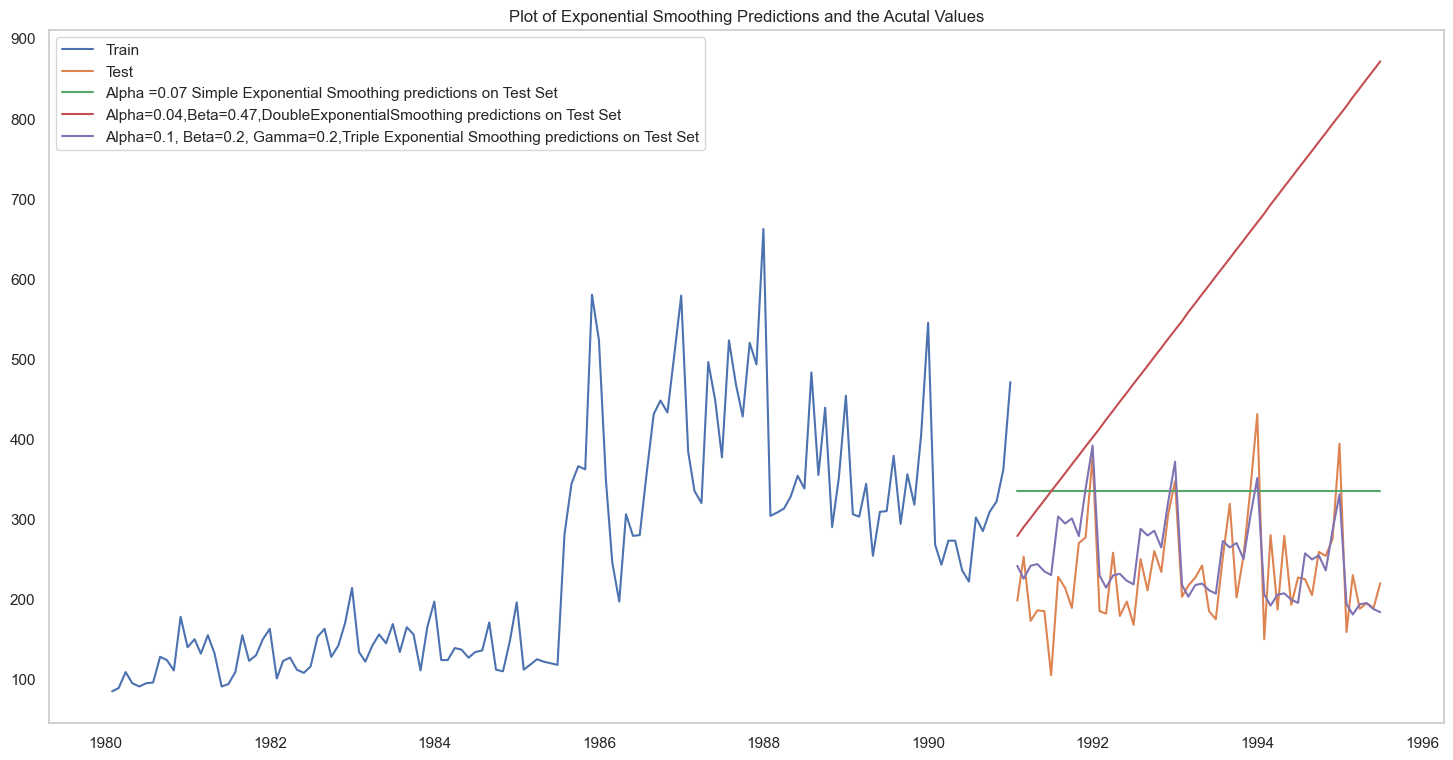

In [123]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(trainshoe['Shoe_Sales'], label='Train')
plt.plot(testshoe['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict', 0.07], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.04, 0.4], label='Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [124]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [125]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [126]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(trainshoe['Shoe_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1508.2837722095956
ARIMA(0, 1, 1) - AIC:1497.0503224187805
ARIMA(0, 1, 2) - AIC:1494.9646053663428
ARIMA(1, 1, 0) - AIC:1501.6431242011242
ARIMA(1, 1, 1) - AIC:1492.4871865078976
ARIMA(1, 1, 2) - AIC:1494.4238594569456
ARIMA(2, 1, 0) - AIC:1498.9504830259416
ARIMA(2, 1, 1) - AIC:1494.4314983035563
ARIMA(2, 1, 2) - AIC:1496.4107391804346


In [127]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
4  (1, 1, 1)  1492.487187
5  (1, 1, 2)  1494.423859
7  (2, 1, 1)  1494.431498
2  (0, 1, 2)  1494.964605
8  (2, 1, 2)  1496.410739
1  (0, 1, 1)  1497.050322
6  (2, 1, 0)  1498.950483
3  (1, 1, 0)  1501.643124
0  (0, 1, 0)  1508.283772

In [128]:
mod = ARIMA(trainshoe['Shoe_Sales'], order=(1,1,1),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -743.244
Date:                Thu, 26 Oct 2023   AIC                           1492.487
Time:                        21:57:06   BIC                           1501.113
Sample:                    01-31-1980   HQIC                          1495.992
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4699      0.111      4.235      0.000       0.252       0.687
ma.L1         -0.8347      0.068    -12.261      0.000      -0.968      -0.701
sigma2      4944.0868    405.583     12.190      0.0

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


#### Predict on the Test Set using this model and evaluate the model.

In [129]:
predicted = results_Arima.forecast(steps=len(testshoe))

In [130]:
from sklearn.metrics import  mean_squared_error
rmse_arima_111 = mean_squared_error(testshoe ,predicted ,squared=False)
print(rmse_arima_111)

143.65924485684616


In [131]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_arima_111]}
                           ,index=['ARIMA (1,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    265.885796
NaiveModel                                          245.923656
Simple Average Model                                 64.495577
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
6 point Trailing Moving Average                      63.553528
9 point Trailing Moving Average                      68.151939
Alpha=0.098,Simple Exponential Smoothing            197.234320
Alpha=0.07,Simple Exponential Smoothing              62.069864
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponenti...   41.558318
ARIMA (1,1,1)                                       143.659245

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [132]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [133]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [134]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(trainshoe['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:1426.336115722155
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1334.5305386143355
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:1426.0492095804898
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:1385.5711563547834
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1319.6061076038222
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1323.6330116787822
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1322.935808409211
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1312.6718076781312
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:1476.0167777381948
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:1405.2509947832373
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1312.436343116388
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:1414.5028237538481
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:1363.4568516025192
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1299.1891899949578
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1309.8511217450177
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1311.0086038813843
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1288.975663062459
SARIMA(0, 1, 2

In [135]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
80  (2, 1, 2)  (2, 0, 2, 6)  1280.778664
26  (0, 1, 2)  (2, 0, 2, 6)  1281.026602
53  (1, 1, 2)  (2, 0, 2, 6)  1282.065372
17  (0, 1, 1)  (2, 0, 2, 6)  1288.975663
50  (1, 1, 2)  (1, 0, 2, 6)  1289.791748

In [136]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(trainshoe['Shoe_Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -633.033
Date:                           Thu, 26 Oct 2023   AIC                           1282.065
Time:                                   21:57:17   BIC                           1304.094
Sample:                                        0   HQIC                          1291.008
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6358      0.472     -1.346      0.178      -1.562       0.290
ma.L1          0.2472      0.473      0.522

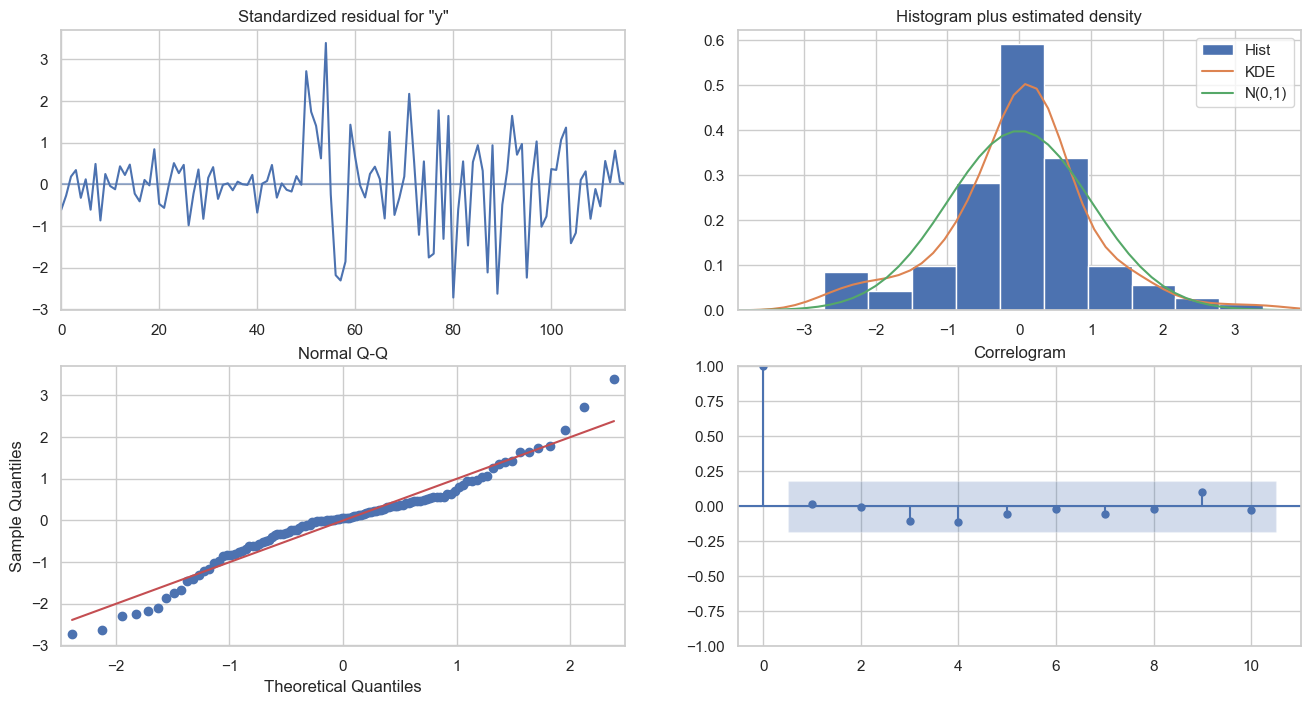

In [137]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Predict on Test Set

In [138]:
pred = results_SARIMA.get_forecast(steps=len(testshoe))
pred.predicted_mean

array([258.28776124, 251.89474101, 266.51046551, 259.44247498,
       244.38208007, 217.9881029 , 319.17275643, 286.36034458,
       312.02710143, 303.66837332, 347.41899442, 442.99474566,
       249.13579589, 245.16967567, 256.57397772, 250.61635131,
       233.99147048, 202.61616598, 307.93537809, 279.32417411,
       301.00142476, 294.11511402, 334.01592408, 420.71744813,
       241.3640623 , 240.25718419, 248.4856592 , 243.81641857,
       225.86014944, 191.01793963, 298.65301833, 273.57071104,
       291.9575957 , 286.28799385, 322.894312  , 402.08849404,
       235.29761079, 236.41672362, 242.12245313, 238.48719671,
       219.6331814 , 182.36775128, 290.99171614, 268.82896299,
       284.53104739, 279.84584248, 313.62824542, 386.41914576,
       230.5991774 , 233.43328169, 237.14332984, 234.33571615,
       214.92743678, 176.06420884])

In [139]:
pred.summary_frame(alpha=0.05)

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0   258.287761   56.235083     148.069024     368.506499
1   251.894741   65.913144     122.707352     381.082130
2   266.510466   77.184667     115.231298     417.789633
3   259.442475   85.374502      92.111526     426.773424
4   244.382080   93.787200      60.562546     428.201614
5   217.988103  100.946420      20.136755     415.839451
6   319.172756  106.073009     111.273480     527.072033
7   286.360345  111.448325      67.925641     504.795048
8   312.027101  116.516186      83.659574     540.394629
9   303.668373  121.409123      65.710864     541.625882
10  347.418994  126.090013     100.287110     594.550878
11  442.994746  130.616959     186.990210     698.999281
12  249.135796  144.317796     -33.721887     531.993479
13  245.169676  152.990985     -54.687144     545.026496
14  256.573978  162.099957     -61.136099     574.284055
15  250.616351  170.174605     -82.919745     584.152448
16  233.991470  178.215178    -115.303860     583.286800
17  202.616166  185.705218    -161.359373     566.591705
18  307.935378  191.166259     -66.743605     682.614361
19  279.324174  197.079056    -106.943677     665.592025
20  301.001425  202.686685     -96.257178     698.260027
21  294.115114  208.225380    -113.999132     702.229360
22  334.015924  213.569583     -84.572766     752.604614
23  420.717448  218.814866      -8.151808     849.586704
24  241.364062  230.411468    -210.234116     692.962241
25  240.257184  238.779216    -227.741480     708.255848
26  248.485659  247.508612    -236.622306     733.593624
27  243.816419  255.541210    -257.035149     744.667986
28  225.860149  263.574175    -290.735741     742.456040
29  191.017940  271.217592    -340.558773     722.594652
30  298.653018  276.911003    -244.082575     841.388611
31  273.570711  283.105643    -281.306154     828.447576
32  291.957596  289.024528    -274.520069     858.435261
33  286.287994  294.913597    -291.732035     864.308022
34  322.894312  300.631786    -266.333161     912.121785
35  402.088494  306.277871    -198.205102    1002.382090
36  235.297611  316.760539    -385.541637     856.136858
37  236.416724  324.881801    -400.339906     873.173353
38  242.122453  333.301215    -411.135925     895.380831
39  238.487197  341.203573    -430.259517     907.233911
40  219.633181  349.118803    -464.627099     903.893462
41  182.367751  356.738967    -516.827776     881.563279
42  290.991716  362.501564    -419.498293    1001.481726
43  268.828963  368.782050    -453.970573     991.628499
44  284.531047  374.811836    -450.086652    1019.148747
45  279.845842  380.837020    -466.581001    1026.272686
46  313.628245  386.711387    -444.312145    1071.568636
47  386.419146  392.533496    -382.932369    1155.770661
48  230.599177  402.212359    -557.722560    1018.920915
49  233.433282  410.058157    -570.265938    1037.132501
50  237.143330  418.153456    -582.422384    1056.709044
51  234.335716  425.846303    -600.307701    1068.979133
52  214.927437  433.557529    -634.829706    1064.684579
53  176.064209  441.037017    -688.352460    1040.480877

In [140]:
rmse_sarima_212 = mean_squared_error(testshoe['Shoe_Sales'],pred.predicted_mean,squared=False)
print(rmse_sarima_212)

55.57928451548639


In [141]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_sarima_212]}
                           ,index=['SARIMA (1,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    265.885796
NaiveModel                                          245.923656
Simple Average Model                                 64.495577
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
6 point Trailing Moving Average                      63.553528
9 point Trailing Moving Average                      68.151939
Alpha=0.098,Simple Exponential Smoothing            197.234320
Alpha=0.07,Simple Exponential Smoothing              62.069864
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponenti...   41.558318
ARIMA (1,1,1)                                       143.659245
SARIMA (1,1,2)(2,0,2,6)                              55.579285

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - 12

In [142]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [143]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [144]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(trainshoe['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1338.366326737317
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1208.4142473347135
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1327.3970510547892
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1312.5867978686424
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1187.0843995008318
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1201.06008315672
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1200.7545174421311
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1188.0396305010797
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1476.0167777381948
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1318.3861206387678
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1185.4842426144032
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1313.5738277003443
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1287.7675669261344
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1164.2974585358818
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1188.1632556767747
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1188.2091371919087
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1165.875706051

In [145]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
23  (0, 1, 2)  (1, 0, 2, 12)  1156.165429
50  (1, 1, 2)  (1, 0, 2, 12)  1157.082589
26  (0, 1, 2)  (2, 0, 2, 12)  1157.772313
77  (2, 1, 2)  (1, 0, 2, 12)  1158.490999
80  (2, 1, 2)  (2, 0, 2, 12)  1158.630325

In [146]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(trainshoe['Shoe_Sales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -571.886
Date:                            Thu, 26 Oct 2023   AIC                           1157.772
Time:                                    21:57:39   BIC                           1176.283
Sample:                                         0   HQIC                          1165.272
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3681      0.081     -4.552      0.000      -0.527      -0.210
ma.L2          0.0553      0.079   

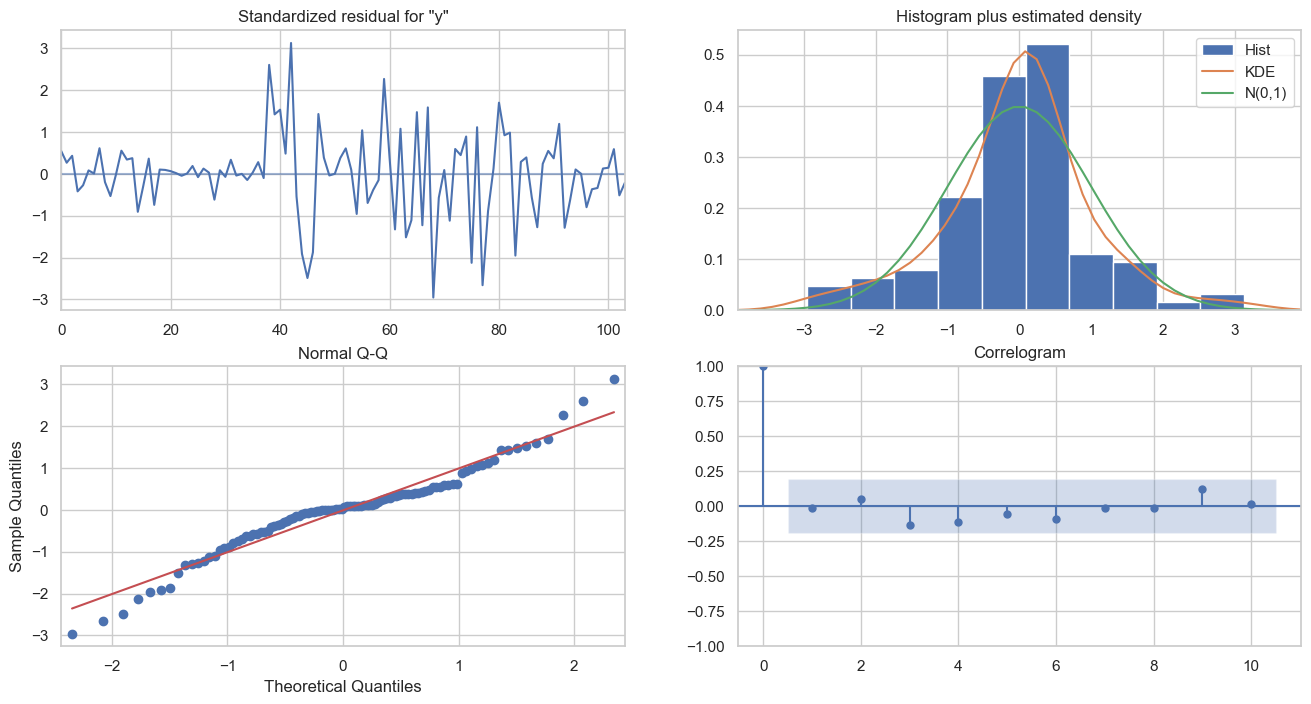

In [147]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

### predict on Test Set - 12

In [148]:
pred = results_SARIMA.get_forecast(steps=len(testshoe))
pred.predicted_mean

array([219.69343128, 193.5982726 , 208.1070039 , 231.55820971,
       212.55208319, 199.33334539, 301.46559111, 281.9450359 ,
       301.1742199 , 284.14406299, 352.19731075, 456.13848207,
       209.80941967, 183.86445501, 197.84451773, 219.69654765,
       209.49016645, 196.44624916, 305.88504826, 281.48298101,
       301.62157893, 279.78832488, 359.75561301, 471.99838522,
       206.20885022, 178.58255317, 193.66463021, 217.38728628,
       204.76415877, 190.75304026, 306.62559097, 281.4121555 ,
       302.81804751, 280.34227929, 363.75084319, 482.43741413,
       201.35117466, 172.06951356, 188.02002634, 213.0823466 ,
       200.01872026, 185.18999467, 308.12407598, 281.26129498,
       303.95662088, 279.99511858, 368.71479399, 494.66240212,
       196.38665911, 165.32616461, 182.25203411, 208.85165369,
       194.93731939, 179.20379679])

In [149]:
pred.summary_frame(alpha=0.05)

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0   219.693431   56.829874     108.308926     331.077937
1   193.598273   67.226218      61.837307     325.359238
2   208.107004   77.740804      55.737829     360.476179
3   231.558210   86.970019      61.100106     402.016314
4   212.552083   95.309733      25.748439     399.355728
5   199.333345  102.976236      -2.496368     401.163058
6   301.465591  110.110240      85.653487     517.277696
7   281.945036  116.809352      53.002913     510.887159
8   301.174220  123.144568      59.815302     542.533138
9   284.144063  129.169441      30.976611     537.311515
10  352.197311  134.925542      87.748107     616.646514
11  456.138482  140.445993     180.869395     731.407569
12  209.809420  153.642831     -91.324995     510.943834
13  183.864455  162.760777    -135.140806     502.869717
14  197.844518  171.817916    -138.912410     534.601445
15  219.696548  180.351372    -133.785646     573.178742
16  209.490166  188.498979    -159.961044     578.941377
17  196.446249  196.308709    -188.311751     581.204249
18  305.885048  203.819414     -93.593663     705.363759
19  281.482981  211.063018    -132.192933     695.158895
20  301.621579  218.066141    -125.780204     729.023361
21  279.788325  224.851253    -160.912033     720.488683
22  359.755613  231.437521     -93.853593     813.364819
23  471.998385  237.841535       5.837543     938.159228
24  206.208850  247.665852    -279.207300     691.625000
25  178.582553  255.752680    -322.683488     679.848594
26  193.664630  263.810241    -323.393941     710.723201
27  217.387286  271.536322    -314.814124     749.588697
28  204.764159  279.048648    -342.161141     751.689458
29  190.753040  286.363957    -370.510002     752.016083
30  306.625591  293.496992    -268.617942     881.869124
31  281.412155  300.460733    -307.480060     870.304371
32  302.818048  307.266692    -299.413603     905.049698
33  280.342279  313.925132    -334.939673     895.624231
34  363.750843  320.445240    -264.310286     991.811973
35  482.437414  326.835356    -158.148112    1123.022940
36  201.351175  336.812064    -458.788340     861.490689
37  172.069514  345.076736    -504.268462     848.407489
38  188.020026  353.384758    -504.601371     880.641424
39  213.082347  361.390429    -495.229878     921.394572
40  200.018720  369.222645    -523.644366     923.681806
41  185.189995  376.892123    -553.504992     923.884981
42  308.124076  384.408614    -445.302963    1061.551115
43  281.261295  391.780925    -486.615208    1049.137798
44  303.956621  399.017047    -478.102421    1086.015662
45  279.995119  406.124260    -515.993804    1075.984041
46  368.714794  413.109210    -440.964380    1178.393968
47  494.662402  419.978055    -328.479460    1317.804264
48  196.386659  430.246670    -646.881318    1039.654636
49  165.326165  438.927483    -694.955894    1025.608223
50  182.252034  447.673360    -695.171628    1059.675696
51  208.851654  456.124634    -685.136202    1102.839509
52  194.937319  464.422238    -715.313540    1105.188179
53  179.203797  472.574159    -747.024535    1105.432129

In [150]:
rmse_sarima_012 = mean_squared_error(testshoe['Shoe_Sales'],pred.predicted_mean,squared=False)
print(rmse_sarima_012)

56.71712086008644


In [151]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_sarima_012]}
                           ,index=['SARIMA (0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    265.885796
NaiveModel                                          245.923656
Simple Average Model                                 64.495577
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
6 point Trailing Moving Average                      63.553528
9 point Trailing Moving Average                      68.151939
Alpha=0.098,Simple Exponential Smoothing            197.234320
Alpha=0.07,Simple Exponential Smoothing              62.069864
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponenti...   41.558318
ARIMA (1,1,1)                                       143.659245
SARIMA (1,1,2)(2,0,2,6)                              55.579285
SARIMA (0,1,2)(2,0,2,12)                             56.717121

### Plot ACF PACF to build ARIMA/SARIMA Model

In [152]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

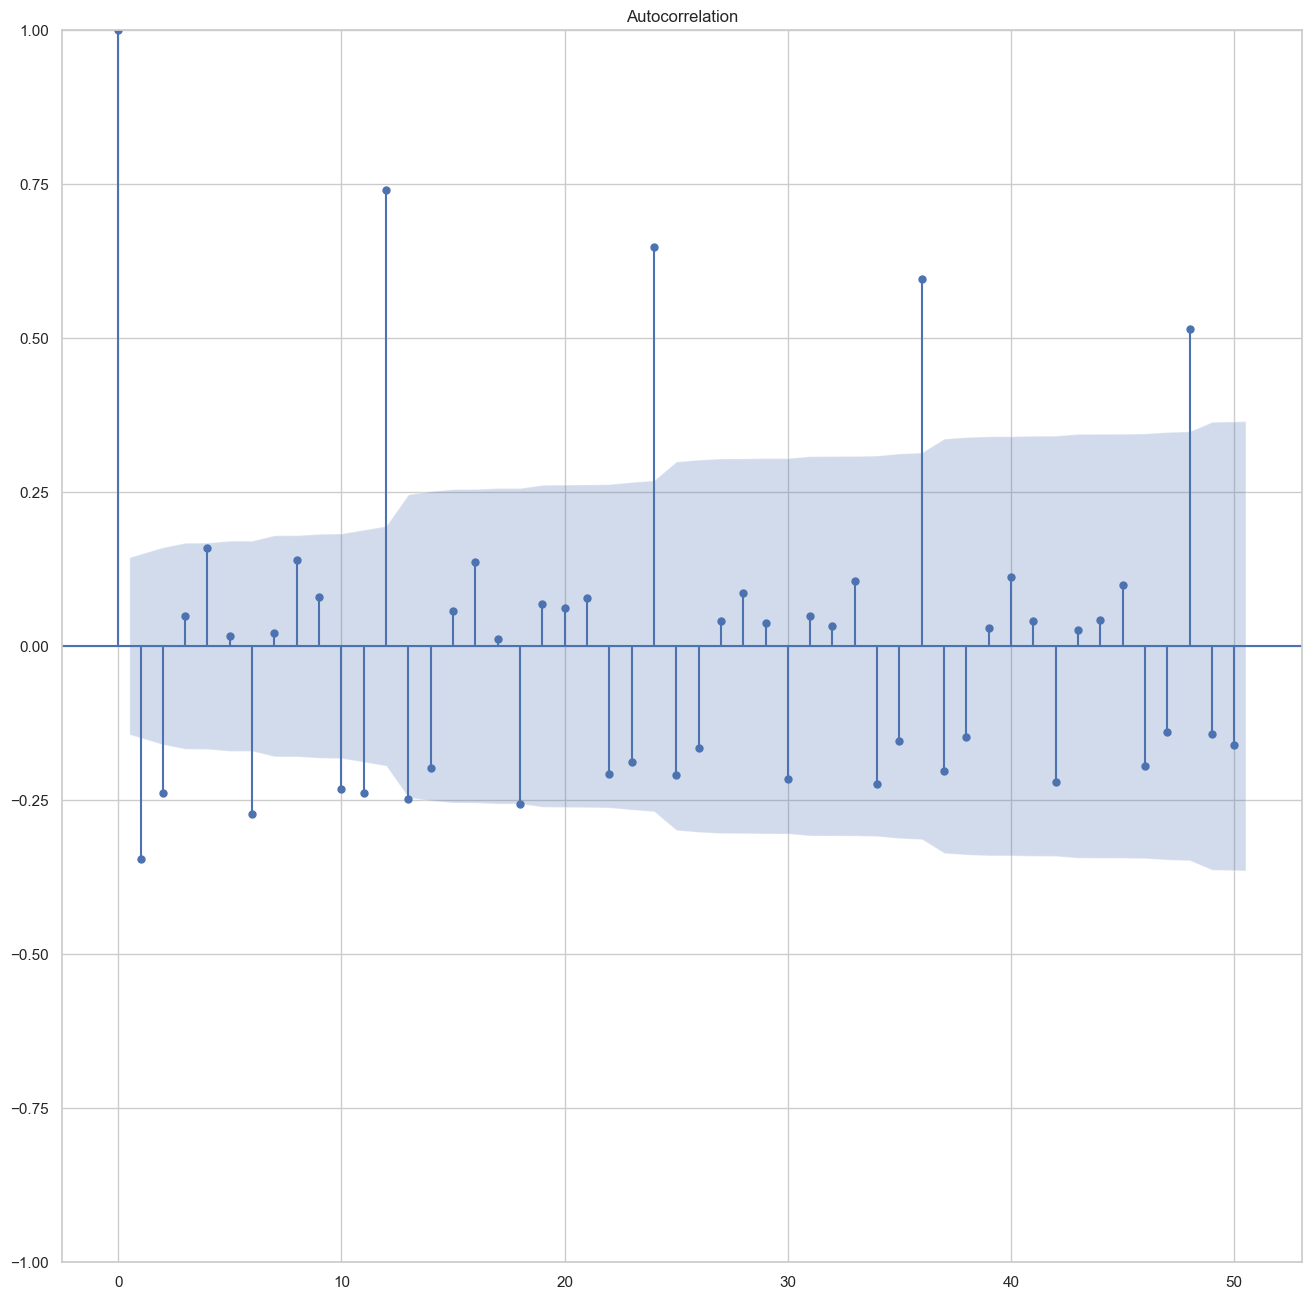

In [153]:
plot_acf(df2.diff().dropna(),lags=50)
plt.show()
#Q = 2

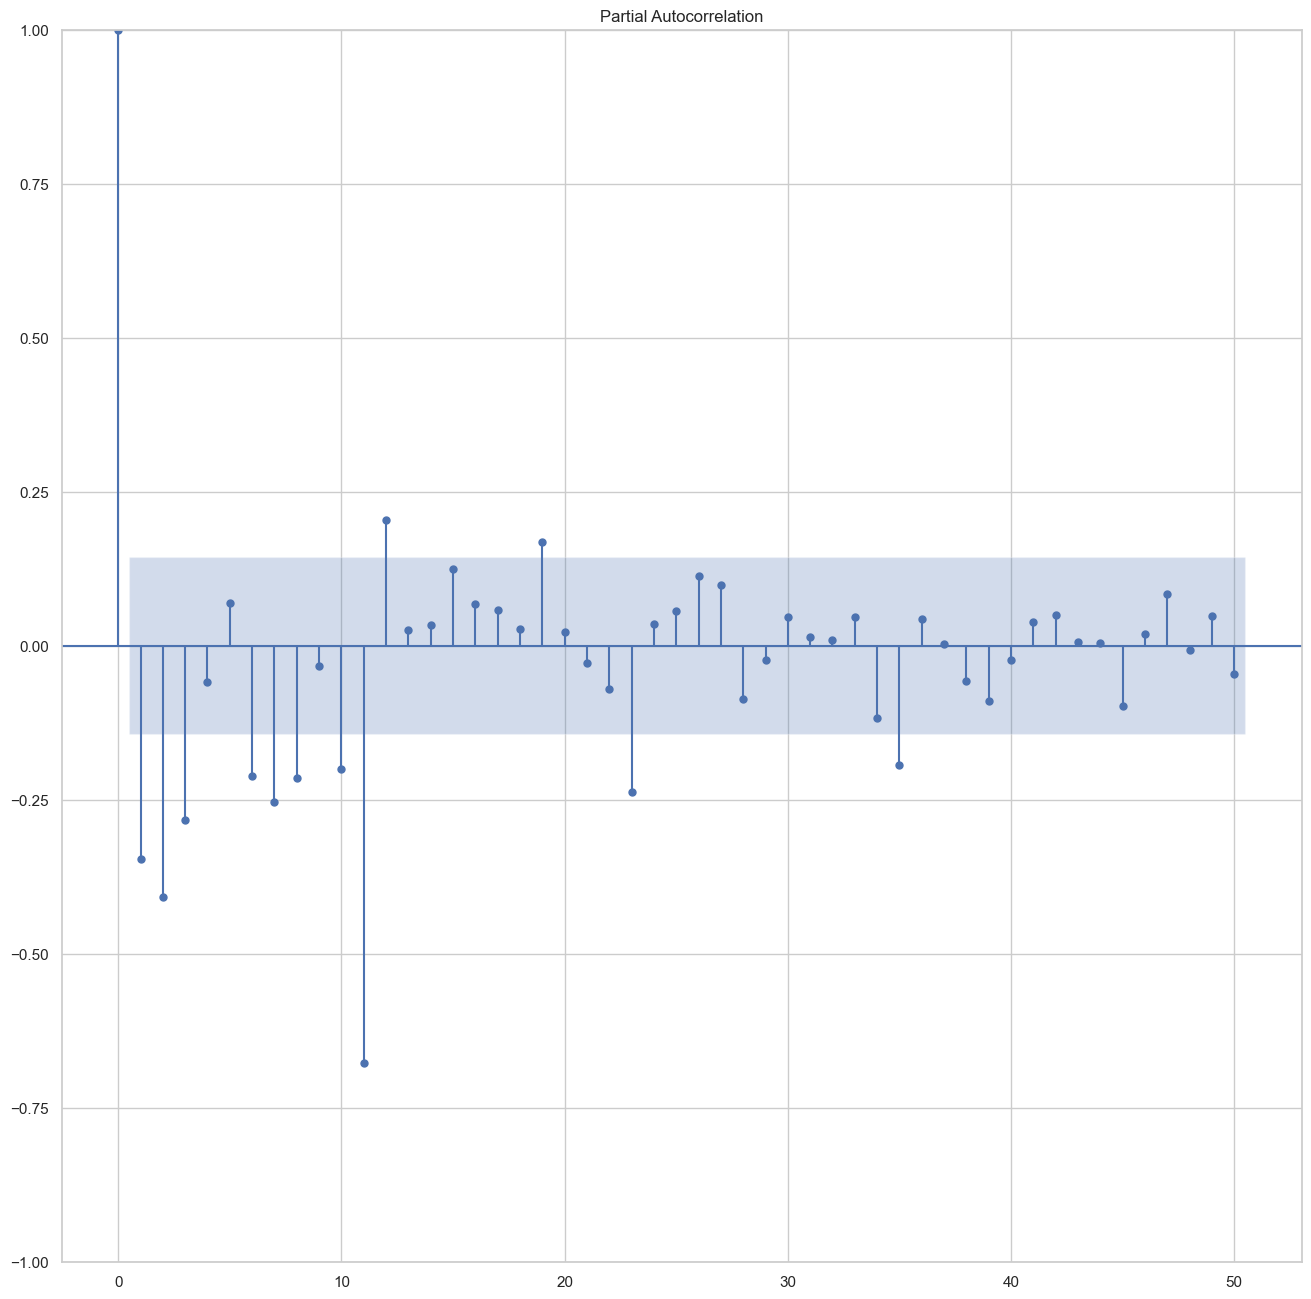

In [154]:
plot_pacf(df2.diff().dropna(),lags=50)
plt.show()

In [155]:
#12th month seasonality fromn PACF
#P = 4 
#pdq = 412

In [156]:
manual_ARIMA = ARIMA(trainshoe['Shoe_Sales'], order=(4,1,2),freq='M')

results_manual_Arima = manual_ARIMA.fit()

print(results_manual_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -741.766
Date:                Thu, 26 Oct 2023   AIC                           1497.532
Time:                        21:57:40   BIC                           1517.658
Sample:                    01-31-1980   HQIC                          1505.710
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4426      0.148     -2.982      0.003      -0.734      -0.152
ar.L2          0.4391      0.165      2.656      0.008       0.115       0.763
ar.L3          0.0591      0.134      0.441      0.6

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [157]:
predicted_manual_ARIMA = results_manual_Arima.forecast(steps=len(testshoe))

In [158]:
rmse_man_arima_010 = mean_squared_error(testshoe,predicted_manual_ARIMA,squared=False)
print(rmse_man_arima_010)

143.47754952464237


In [159]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_man_arima_010]}
                           ,index=['Manual ARIMA (4,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    265.885796
NaiveModel                                          245.923656
Simple Average Model                                 64.495577
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
6 point Trailing Moving Average                      63.553528
9 point Trailing Moving Average                      68.151939
Alpha=0.098,Simple Exponential Smoothing            197.234320
Alpha=0.07,Simple Exponential Smoothing              62.069864
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponenti...   41.558318
ARIMA (1,1,1)                                       143.659245
SARIMA (1,1,2)(2,0,2,6)                              55.579285
SARIMA (0,1,2)(2,0,2,12)                             56.717121
Manual ARIMA (4,1,2)                                143.477550

In [171]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(trainshoe['Shoe_Sales'].values,
                                order=(4, 1, 2),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = mod.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(1, 1, [1], 6)   Log Likelihood                -633.153
Date:                             Thu, 26 Oct 2023   AIC                           1284.305
Time:                                     22:21:18   BIC                           1309.010
Sample:                                          0   HQIC                          1294.333
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4466      0.140     -3.194      0.001      -0.721      -0.173
ar.L2          0.7939      

In [172]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(testshoe))

In [173]:
rmse_man_sarima_010 = mean_squared_error(testshoe['Shoe_Sales'],predicted_manual_SARIMA,squared=False)
print(rmse_man_sarima_010)

79.97379482117003


In [174]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_man_sarima_010]}
                           ,index=['Manual SARIMA (4,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    265.885796
NaiveModel                                          245.923656
Simple Average Model                                 64.495577
2 point Trailing Moving Average                      46.226445
4 point Trailing Moving Average                      57.933291
6 point Trailing Moving Average                      63.553528
9 point Trailing Moving Average                      68.151939
Alpha=0.098,Simple Exponential Smoothing            197.234320
Alpha=0.07,Simple Exponential Smoothing              62.069864
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponenti...   41.558318
ARIMA (1,1,1)                                       143.659245
SARIMA (1,1,2)(2,0,2,6)                              55.579285
SARIMA (0,1,2)(2,0,2,12)                             56.717121
Manual ARIMA (4,1,2)                                143.477550
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Manual SARIMA (4,1,2)                                79.973795

In [175]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponenti...   41.558318
2 point Trailing Moving Average                      46.226445
SARIMA (1,1,2)(2,0,2,6)                              55.579285
SARIMA (0,1,2)(2,0,2,12)                             56.717121
4 point Trailing Moving Average                      57.933291
Alpha=0.04,Beta=0.4,Double Exponential Smoothing     61.459830
Alpha=0.07,Simple Exponential Smoothing              62.069864
6 point Trailing Moving Average                      63.553528
Simple Average Model                                 64.495577
9 point Trailing Moving Average                      68.151939
Manual SARIMA (4,1,2)                                79.973795
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Alpha=0.0656, Beta=0.051, Gamma=0.000,Triple Ex...  101.872986
Manual ARIMA (4,1,2)                                143.477550
ARIMA (1,1,1)                                       143.659245
Alpha=0.098,Simple Exponential Smoothing            197.234320
NaiveModel                                          245.923656
RegressionOnTime                                    265.885796
Alpha =0.017 Beta=3.23e-05 Double Exponential S...  309.876368

In [176]:
resultsDf.to_csv('predict1.csv')

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. 

The model to be built on the whole data are the following:

Alpha=0.1, Beta=0.2, Gamma=0.2,Triple Exponential Smoothing

In [178]:
df = pd.read_csv('Shoe-Sales.csv', parse_dates=True,squeeze=True,index_col=0)
df.head()

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
Name: Shoe_Sales, dtype: int64

In [179]:
df.fillna(method='ffill', inplace=True)

In [180]:
df

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
             ... 
1995-03-01    188
1995-04-01    195
1995-05-01    189
1995-06-01    220
1995-07-01    274
Name: Shoe_Sales, Length: 187, dtype: int64

In [181]:
fullmodel2 = ExponentialSmoothing(df, trend='additive', seasonal='additive').fit(smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.2)

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [183]:
RMSE_fullmodel2 = metrics.mean_squared_error(df,fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 61.49336881150816


In [184]:
prediction_1 = fullmodel2.forecast(steps=12)

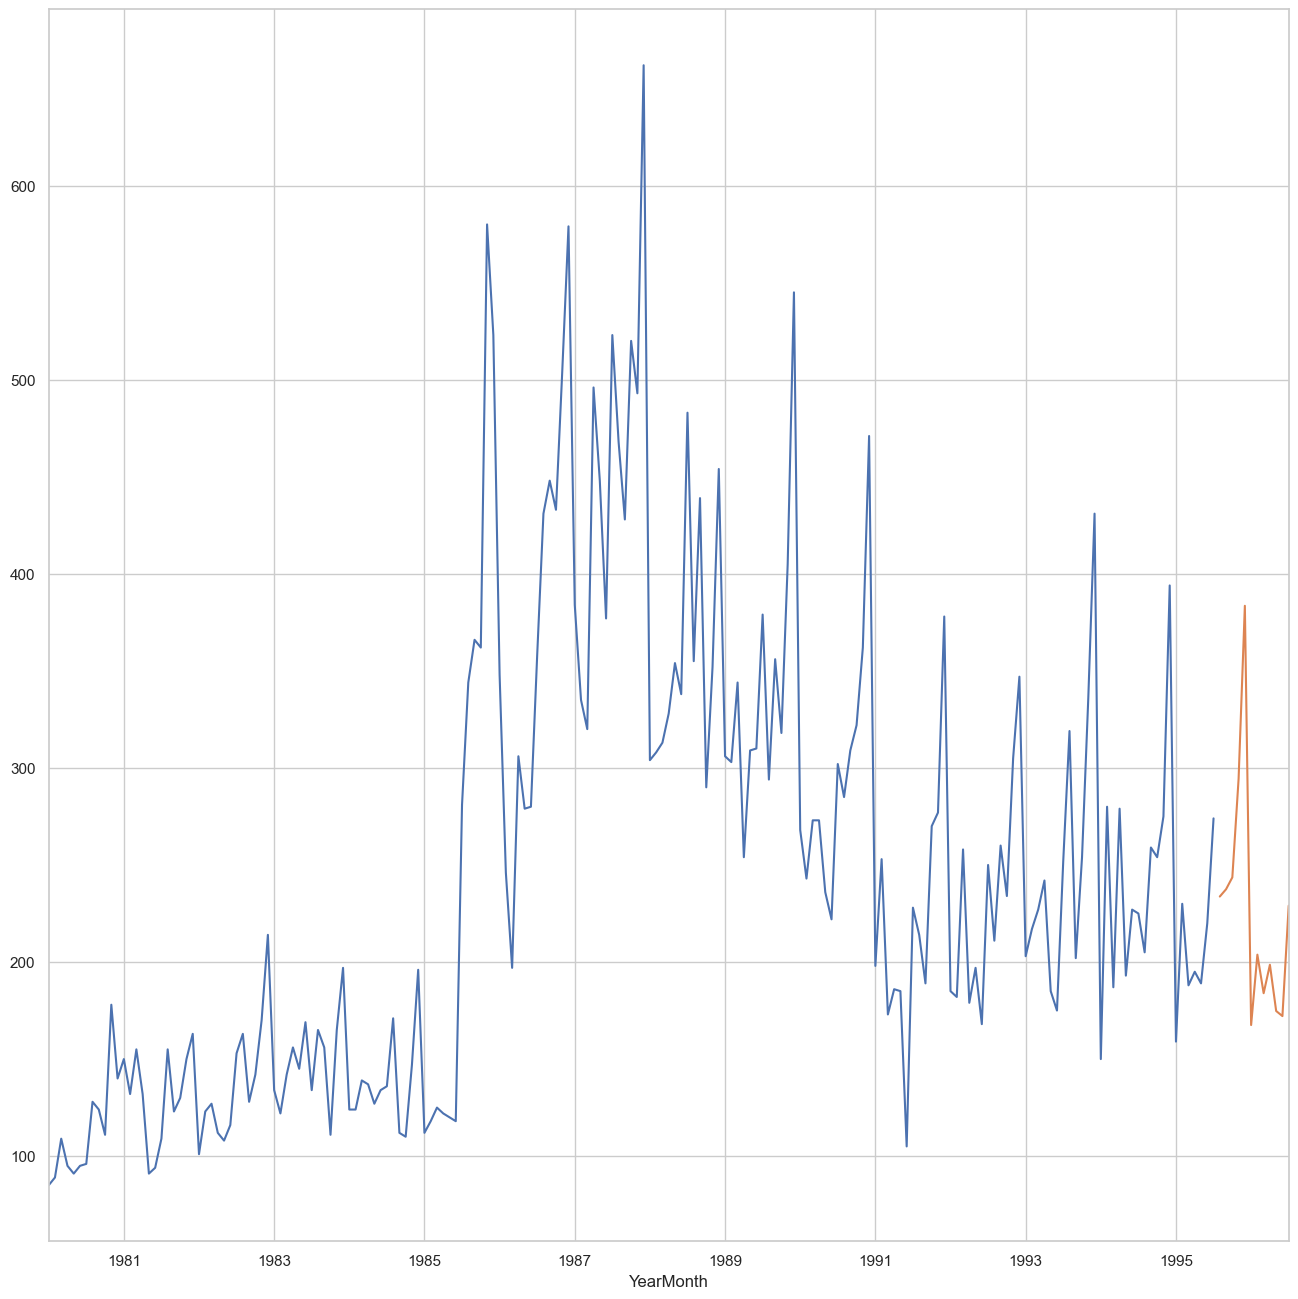

In [185]:
df.plot()
prediction_1.plot();

In [186]:
np.std(fullmodel2.resid,ddof=1)

61.65680389181713

In [187]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_1_df.head(12)

lower_CI  prediction    upper_ci
1995-08-01  112.892479  233.739815  354.587150
1995-09-01  116.655184  237.502520  358.349856
1995-10-01  122.763962  243.611298  364.458634
1995-11-01  173.510436  294.357772  415.205107
1995-12-01  262.676357  383.523693  504.371029
1996-01-01   46.693648  167.540984  288.388319
1996-02-01   82.945398  203.792734  324.640070
1996-03-01   63.081457  183.928792  304.776128
1996-04-01   77.753798  198.601134  319.448470
1996-05-01   53.922156  174.769492  295.616827
1996-06-01   51.298301  172.145637  292.992972
1996-07-01  108.200130  229.047466  349.894801

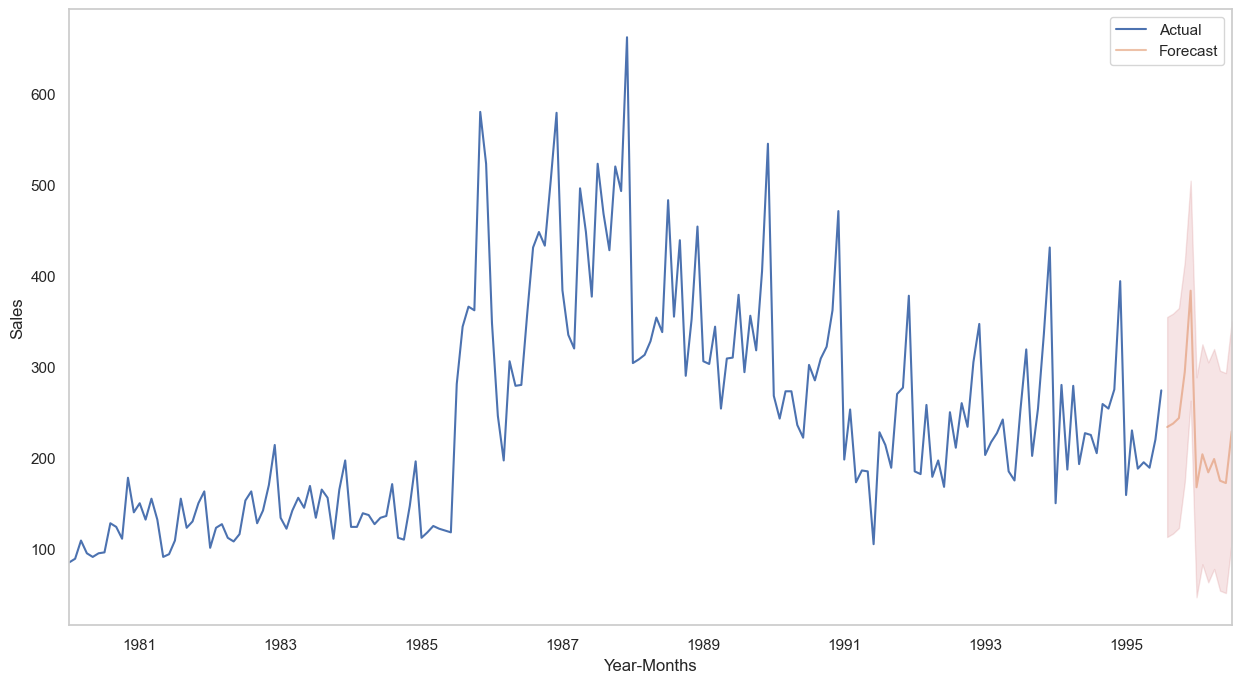

In [188]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='r', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')

plt.grid()
plt.show()